In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core import display as ICD
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
import seaborn as sns
from IPython.display import Image, display
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [132]:
conda install python-graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [133]:
conda install pip

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


# Part I
# Section I - Variable Mapping

In [136]:
raw_data = pd.read_csv('Credit_data_RSM6305.txt', sep = ' ')
raw_data.columns = ['Chk_acct', 'Duration', 'Credit_history', 'Purpose', 'Credit_amt',
                    'Savings_acct', 'Present_emp', 'Instalment_rate', 'Personal_status',
                    'Other_debt', 'Present_res', 'Property', 'Age', 'Other_installment',
                    'Housing', 'n_credits', 'Job', 'n_ppl', 'Telephone', 'Foreign_worker',
                    'Credit_status']

In [137]:
# label categorical varibles as per the guidelines to better understand varibles and conduct further analysis

# Chk_acct
raw_data['Chk_acct'].replace(['A11','A12','A13','A14'], 
                             ['chk_acc < 0 DM',
                              '0 <= chk_acc < 200 DM',
                              'chk_acc >= 200 DM',
                              'no chk_acc'], inplace=True)

# Credit_history
raw_data['Credit_history'].replace(['A30','A31','A32','A33','A34'], 
                                   ['no credits taken/all credits paid back duly',
                                    'all credits at this bank paid back duly',
                                    'existing credits paid back duly till now',
                                    'delay in paying off in the past',
                                    'critical account/other credits existing'], inplace=True)

# Purpose
raw_data['Purpose'].replace(['A40','A41','A42','A43','A44','A45','A46','A47','A48','A49','A410'], 
                            ['car (new)',
                             'car (used)',
                             'furniture/equipment',
                             'radio/television',
                             'domestic appliances',
                             'repairs',
                             'education',
                             'vacation',
                             'retraining',
                             'business',
                             'others'], inplace=True)

# Savings_acct
raw_data['Savings_acct'].replace(['A61','A62','A63','A64','A65'], 
                                 ['savings_acct < 100 DM',
                                  '100 <= savings_acct < 500 DM',
                                  '500 <= savings_acct < 1000 DM',
                                  'savings_acct >= 1000 DM',
                                  'unknown/no savings account'], inplace=True)

# Present_emp
raw_data['Present_emp'].replace(['A71','A72','A73','A74','A75'], 
                                 ['unemployed',
                                  'emp < 1 year',
                                  '1 <= emp < 4 years',
                                  '4 <= emp < 7 years',
                                  'emp >= 7 years'], inplace=True)

# Personal_status
raw_data['Personal_status'].replace(['A91','A92','A93','A94','A95'], 
                                 ['male: divorced/separated',
                                  'female: divorced/separated/married',
                                  'male: single',
                                  'male: married/widowed',
                                  'female: single'], inplace=True)

# Other_debt
raw_data['Other_debt'].replace(['A101','A102','A103'], 
                               ['none',
                                'co-applicant',
                                'guarantor'], inplace=True)

# Property
raw_data['Property'].replace(['A121','A122','A123','A124'], 
                             ['real estate',
                              'building society savings agreement/life insurance',
                              'car or other',
                              'unknown/no property'], inplace=True)

# Other_installment
raw_data['Other_installment'].replace(['A141','A142','A143'], 
                                      ['bank',
                                       'stores',
                                       'none'], inplace=True)

# Housing
raw_data['Housing'].replace(['A151','A152','A153'], 
                            ['rent',
                             'own',
                             'for free'], inplace=True)

# Job
raw_data['Job'].replace(['A171','A172','A173','A174'], 
                        ['unemployed/unskilled - non-resident',
                         'unskilled - resident',
                         'skilled employee/official',
                         'management/self-employed/highly qualified employee/officer'], inplace=True)

# Telephone
raw_data['Telephone'].replace(['A191','A192'], 
                              ['none',
                               'yes, registered under the customer’s name'], inplace=True)

# Foreign_worker
raw_data['Foreign_worker'].replace(['A201','A202'], 
                                   ['yes',
                                    'no'], inplace=True)

In [138]:
# replace credit status column with 0 and 1 for later calculation
# 0 for bad credit, 1 for good credit
raw_data['Credit_status'].replace([1,2], [0,1], inplace=True)
raw_data.head()

,Chk_acct,Duration,Credit_history,Purpose,Credit_amt,Savings_acct,Present_emp,Instalment_rate,Personal_status,Other_debt,...,Property,Age,Other_installment,Housing,n_credits,Job,n_ppl,Telephone,Foreign_worker,Credit_status
1,chk_acc < 0 DM,6.0,critical account/other credits existing,radio/television,1169.0,unknown/no savings account,emp >= 7 years,4.0,male: single,none,...,real estate,67.0,none,own,2.0,skilled employee/official,1.0,"yes, registered under the customer’s name",yes,0
2,0 <= chk_acc < 200 DM,48.0,existing credits paid back duly till now,radio/television,5951.0,savings_acct < 100 DM,1 <= emp < 4 years,2.0,female: divorced/separated/married,none,...,real estate,22.0,none,own,1.0,skilled employee/official,1.0,NaN,yes,1
3,no chk_acc,12.0,critical account/other credits existing,education,2096.0,NaN,4 <= emp < 7 years,2.0,male: single,none,...,real estate,49.0,none,NaN,1.0,unskilled - resident,2.0,none,yes,0
4,chk_acc < 0 DM,42.0,existing credits paid back duly till now,furniture/equipment,7882.0,savings_acct < 100 DM,4 <= emp < 7 years,2.0,male: single,guarantor,...,building society savings agreement/life insurance,45.0,none,for free,1.0,skilled employee/official,2.0,none,yes,0
5,chk_acc < 0 DM,24.0,delay in paying off in the past,car (new),4870.0,savings_acct < 100 DM,1 <= emp < 4 years,3.0,NaN,none,...,unknown/no property,53.0,none,for free,2.0,skilled employee/official,NaN,none,yes,1


In [139]:
raw_data['Credit_status'].value_counts()

0    700
1    300
Name: Credit_status, dtype: int64

In [140]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
Chk_acct             969 non-null object
Duration             929 non-null float64
Credit_history       935 non-null object
Purpose              951 non-null object
Credit_amt           973 non-null float64
Savings_acct         977 non-null object
Present_emp          958 non-null object
Instalment_rate      982 non-null float64
Personal_status      926 non-null object
Other_debt           982 non-null object
Present_res          940 non-null float64
Property             927 non-null object
Age                  978 non-null float64
Other_installment    969 non-null object
Housing              938 non-null object
n_credits            984 non-null float64
Job                  994 non-null object
n_ppl                934 non-null float64
Telephone            934 non-null object
Foreign_worker       937 non-null object
Credit_status        1000 non-null int64
dtypes: float64(7), int64

# Section II - Exploratory Data Analysis & Wrangling

## 1) Plot Analysis
### Categorical variables - Bar Chart

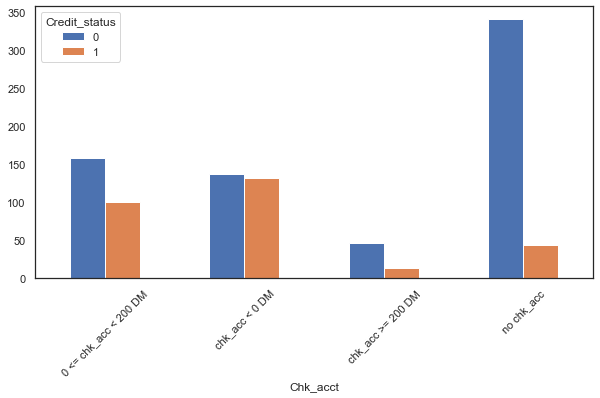

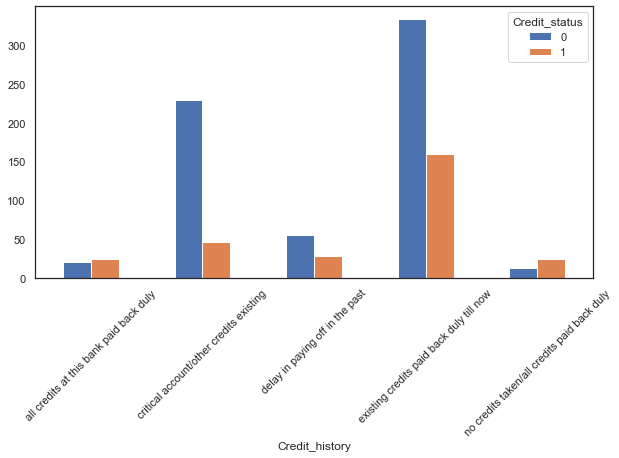

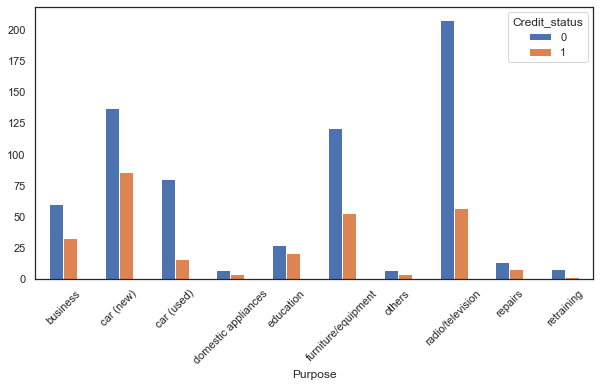

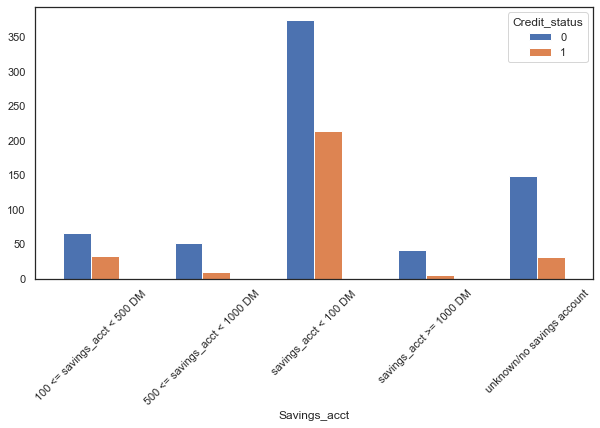

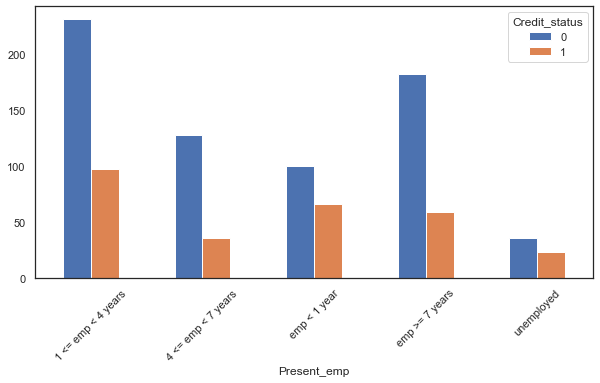

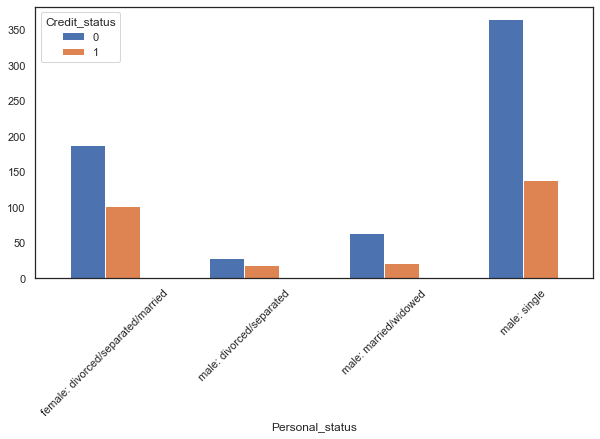

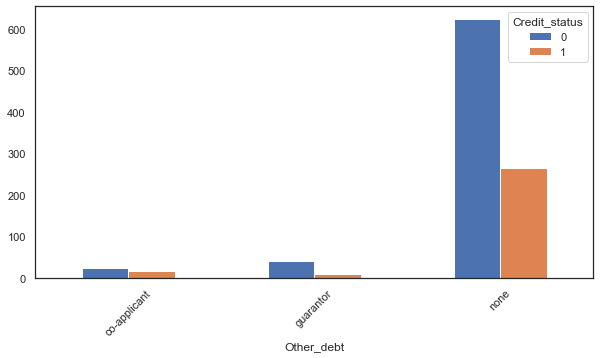

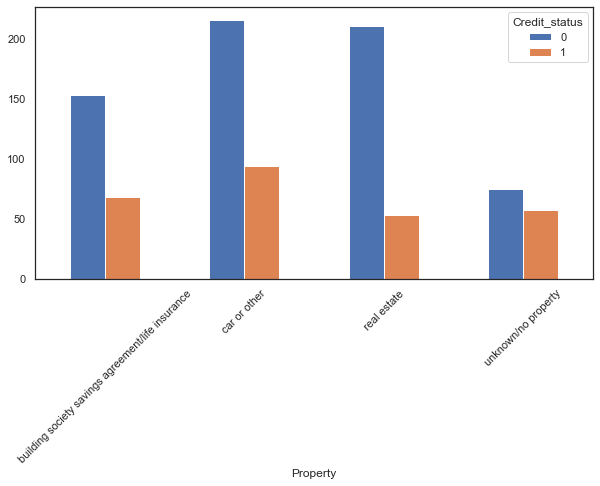

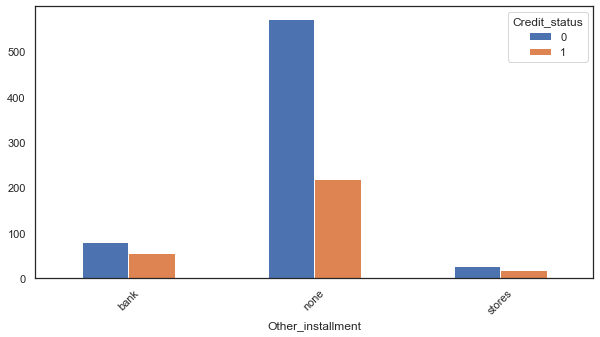

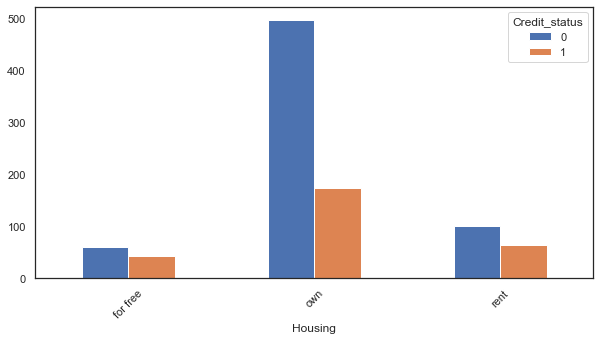

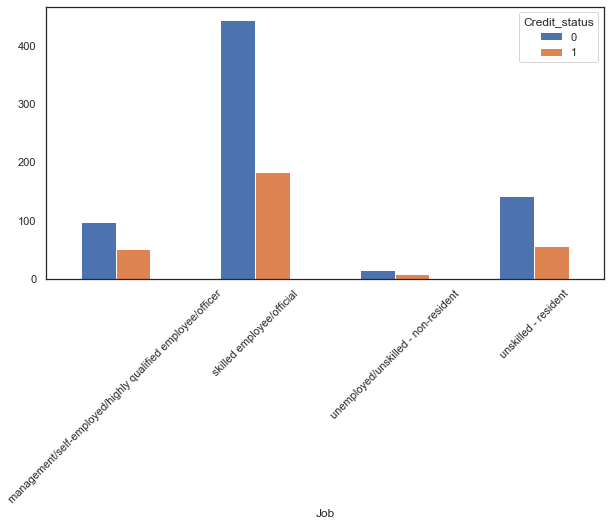

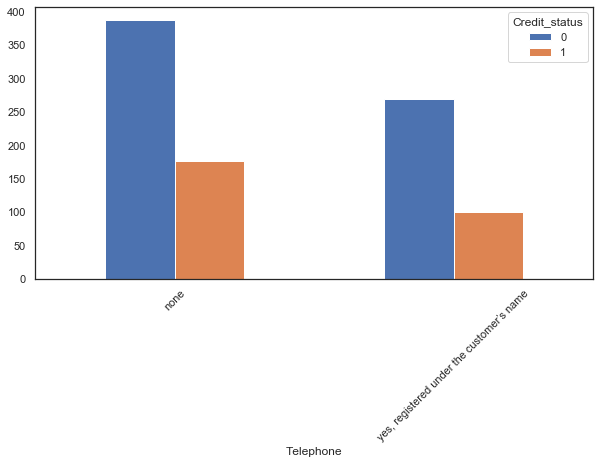

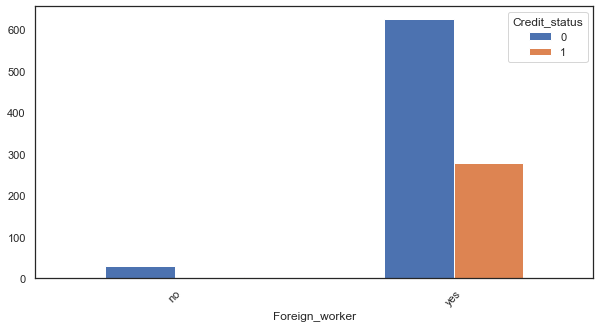

In [141]:
target = 'Credit_status'
cat_var = ['Chk_acct', 'Credit_history', 'Purpose', 'Savings_acct', 'Present_emp',
           'Personal_status', 'Other_debt', 'Property', 'Other_installment', 'Housing',
           'Job', 'Telephone', 'Foreign_worker']

for i in cat_var:
    cross_df = pd.crosstab(raw_data[i], raw_data['Credit_status'])
    cross_df.plot.bar(rot=45, figsize=(10,5))    

### Continuous variables - Histogram

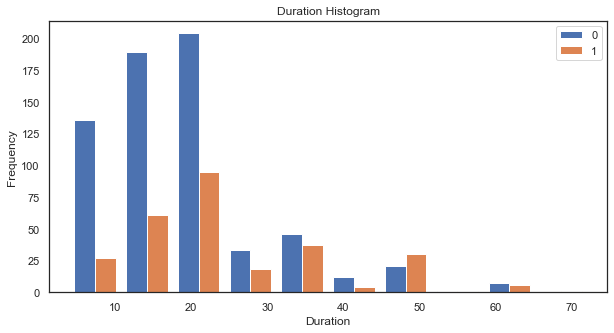

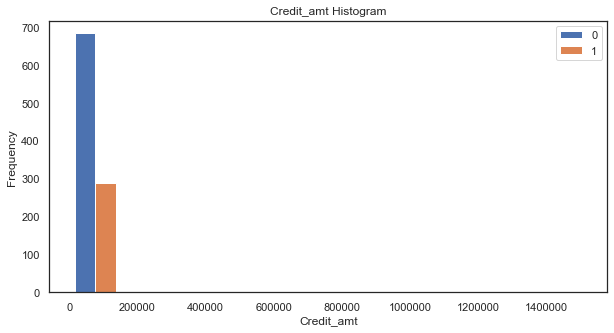

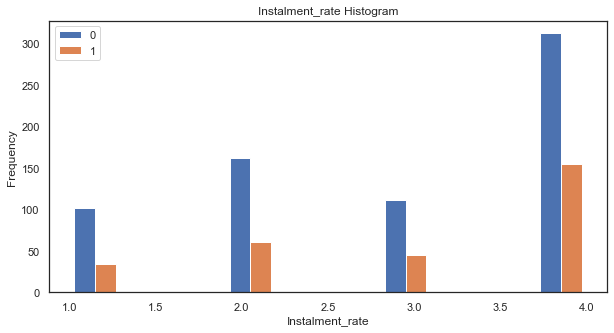

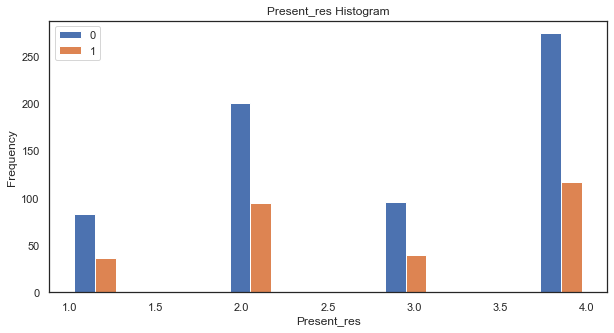

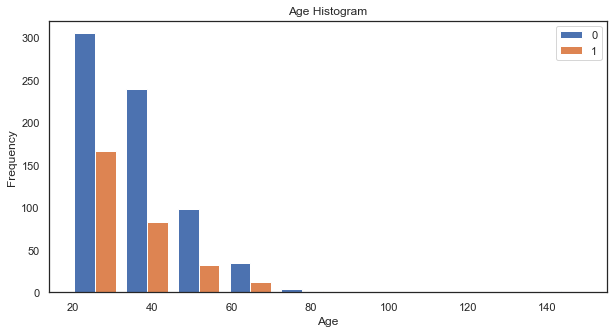

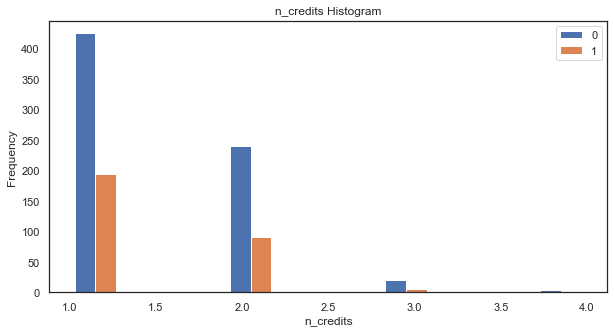

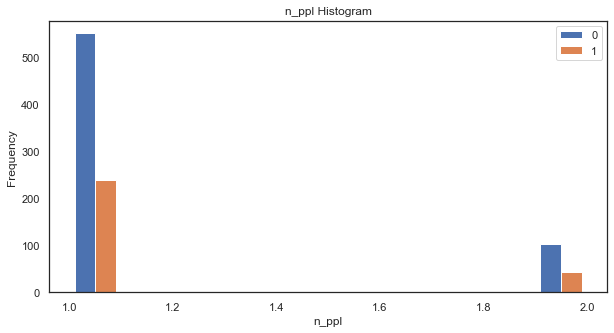

In [142]:
cts_var = ['Duration', 'Credit_amt', 'Instalment_rate', 'Present_res','Age','n_credits','n_ppl']

for i in cts_var:
    d0 = raw_data[raw_data['Credit_status']==0][i]
    d1 = raw_data[raw_data['Credit_status']==1][i]
    plt.figure(figsize=(10,5))
    plt.hist([d0, d1])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend(['0', '1'])
    plt.title(i + ' Histogram')
    plt.show()

### Continuous variables - Box Plot

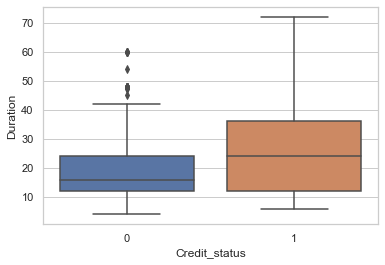

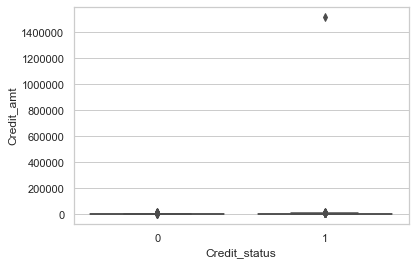

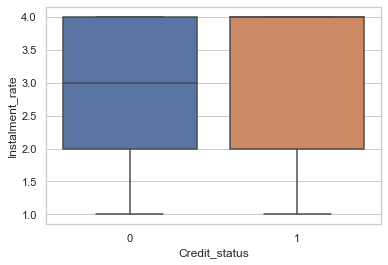

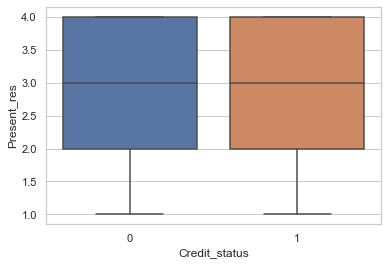

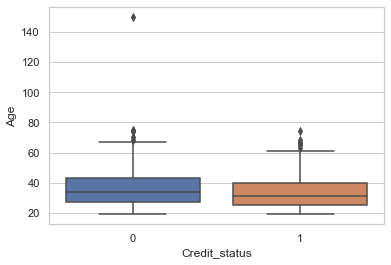

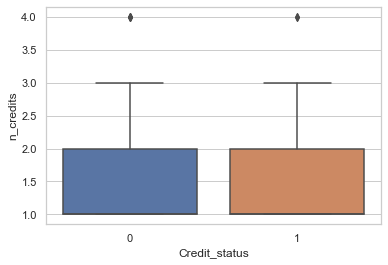

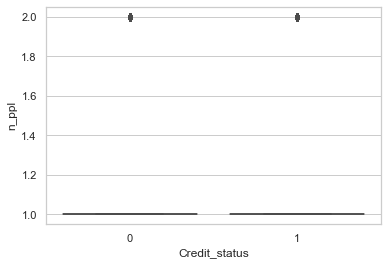

In [143]:
 for i in cts_var:
    plt.figure()
    sns.set_style("whitegrid") 
    sns.boxplot(x='Credit_status', y=i, data=raw_data)

In [144]:
raw_data.describe()

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl,Credit_status
count,929.000000,9.730000e+02,982.000000,940.000000,978.000000,984.000000,934.000000,1000.000000
mean,20.900969,4.827616e+03,2.971487,2.848936,35.620654,1.409553,1.155246,0.300000
std,12.238686,4.870444e+04,1.121199,1.102108,11.894636,0.577600,0.362333,0.458487
min,4.000000,2.500000e+02,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1.364000e+03,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2.323000e+03,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3.979000e+03,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,1.520000e+06,4.000000,4.000000,150.000000,4.000000,2.000000,1.000000


## Outliers Treatment: Winsorization

In [145]:
raw_data2 = raw_data.copy()
cts_outliers = ['Duration', 'Credit_amt', 'Age']

# Duration: use 90% percentile
data_dur = raw_data2['Duration']
upper_p_dur = data_dur.quantile(0.9)
raw_data2['Duration'] = np.where(data_dur > upper_p_dur, upper_p_dur, data_dur)

# Credit_amt: use 90% percentile
data_cre = raw_data2['Credit_amt']
upper_p_cre = data_cre.quantile(0.9)
raw_data2['Credit_amt'] = np.where(data_cre > upper_p_cre, upper_p_cre, data_cre)

# Age: use 95% percentile
data_age = raw_data2['Age']
upper_p_age = data_age.quantile(0.95)
raw_data2['Age'] = np.where(data_age > upper_p_age, upper_p_age, data_age)

In [146]:
raw_data2.describe()

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl,Credit_status
count,929.000000,973.000000,982.000000,940.000000,978.000000,984.000000,934.000000,1000.000000
mean,19.761033,3003.231860,2.971487,2.848936,35.295501,1.409553,1.155246,0.300000
std,9.790640,2072.616266,1.121199,1.102108,10.738522,0.577600,0.362333,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2323.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3979.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,36.000000,7217.200000,4.000000,4.000000,60.000000,4.000000,2.000000,1.000000


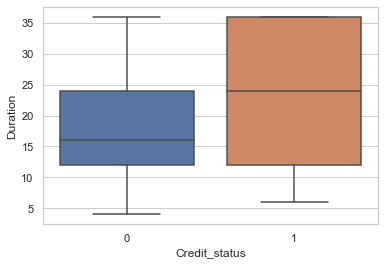

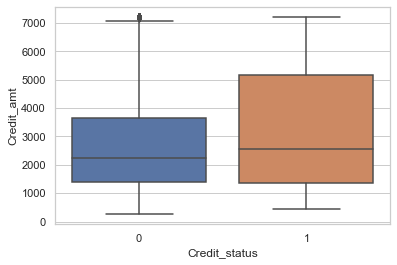

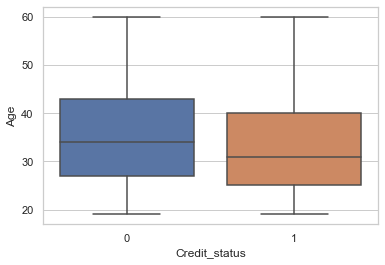

In [147]:
# box plots after removing outliers
for i in cts_outliers:
    plt.figure()
    sns.set_style("whitegrid") 
    sns.boxplot(x='Credit_status', y=i, data=raw_data2)

## 2) Dealing with Missing Data: Data Imputation

#### Continuous variables: replace NaN with median

In [148]:
for i in cts_var:
    raw_data2[i].fillna(raw_data2[i].median(), inplace=True)

raw_data2.describe()

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl,Credit_status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.636000,2984.865600,2.972000,2.858000,35.245000,1.403000,1.145000,0.300000
std,9.447156,2047.389879,1.111058,1.069102,10.624964,0.575258,0.352277,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2323.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3959.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,36.000000,7217.200000,4.000000,4.000000,60.000000,4.000000,2.000000,1.000000


#### Categorical variables: replace NaN with the highest occurance

In [149]:
for i in cat_var:
    raw_data2[i].fillna((raw_data2[i].value_counts(ascending=True).index)[-1], inplace=True)
    
raw_data2.describe(include=np.object)

,Chk_acct,Credit_history,Purpose,Savings_acct,Present_emp,Personal_status,Other_debt,Property,Other_installment,Housing,Job,Telephone,Foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no chk_acc,existing credits paid back duly till now,radio/television,savings_acct < 100 DM,1 <= emp < 4 years,male: single,none,car or other,none,own,skilled employee/official,none,yes
freq,415,558,314,612,370,576,907,383,821,732,633,630,967


## 3) & 4) Cross Contingency Table & Chi-square Test - Categorical Variables

In [150]:
# Chi-square Test Assumptions

# (1) The levels (groups) of the variables being tested are mutually exclusive
# (2) The groups being tested are independent
# (3) The value of expected cells are greater than 5 for at least 20% of the cells

In [151]:
significant_cats = []

for i in cat_var:
    table = pd.crosstab(raw_data2.Credit_status, raw_data2[i], margins=True, margins_name='Total')
    table_perc = pd.crosstab(raw_data2.Credit_status, raw_data2[i], normalize='index')
    
    table2 = pd.crosstab(raw_data2.Credit_status, raw_data2[i])
    chi_value, p_value, dof, ex = stats.chi2_contingency(table2)
    ICD.display(table, table_perc)
    
    print('H0: ' + i + ' is independent from Credit_status')
    print('Chi-square value for ' + i + ' is ' + str(chi_value))
    print('P-value for ' + i + ' is ' + str(p_value))
    print('Degree of freedom for ' + i + ' is ' + str(dof))
    print('Expected values for ' + i + ' are: ' + str(ex))
    
    if p_value < 0.05:
        significant_cats.append(i)
        print('Reject null hypothesis since p-value < 0.05. Categorical variable: ' + i + ' is statistically significant.')
    else:
        print('Fail to reject null hypothesis.')
        
    print('------------------------------------------------------------------------------------------')

Chk_acct,0 <= chk_acc < 200 DM,chk_acc < 0 DM,chk_acc >= 200 DM,no chk_acc,Total
Credit_status,,,,,
0,158,136,46,360,700
1,100,132,13,55,300
Total,258,268,59,415,1000


Chk_acct,0 <= chk_acc < 200 DM,chk_acc < 0 DM,chk_acc >= 200 DM,no chk_acc
Credit_status,,,,
0,0.225714,0.194286,0.065714,0.514286
1,0.333333,0.440000,0.043333,0.183333


H0: Chk_acct is independent from Credit_status
Chi-square value for Chk_acct is 113.94370810372375
P-value for Chk_acct is 1.5541249339551447e-24
Degree of freedom for Chk_acct is 3
Expected values for Chk_acct are: [[180.6 187.6  41.3 290.5]
 [ 77.4  80.4  17.7 124.5]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Chk_acct is statistically significant.
------------------------------------------------------------------------------------------


Credit_history,all credits at this bank paid back duly,critical account/other credits existing,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly,Total
Credit_status,,,,,,
0,21,229,55,382,13,700
1,25,46,28,176,25,300
Total,46,275,83,558,38,1000


Credit_history,all credits at this bank paid back duly,critical account/other credits existing,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly
Credit_status,,,,,
0,0.030000,0.327143,0.078571,0.545714,0.018571
1,0.083333,0.153333,0.093333,0.586667,0.083333


H0: Credit_history is independent from Credit_status
Chi-square value for Credit_history is 60.41523015587963
P-value for Credit_history is 2.3727940291708546e-12
Degree of freedom for Credit_history is 4
Expected values for Credit_history are: [[ 32.2 192.5  58.1 390.6  26.6]
 [ 13.8  82.5  24.9 167.4  11.4]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Credit_history is statistically significant.
------------------------------------------------------------------------------------------


Purpose,business,car (new),car (used),domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining,Total
Credit_status,,,,,,,,,,,
0,60,137,80,7,27,121,7,240,13,8,700
1,33,86,16,4,21,53,4,74,8,1,300
Total,93,223,96,11,48,174,11,314,21,9,1000


Purpose,business,car (new),car (used),domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining
Credit_status,,,,,,,,,,
0,0.085714,0.195714,0.114286,0.010000,0.038571,0.172857,0.010000,0.342857,0.018571,0.011429
1,0.110000,0.286667,0.053333,0.013333,0.070000,0.176667,0.013333,0.246667,0.026667,0.003333


H0: Purpose is independent from Credit_status
Chi-square value for Purpose is 30.384538300634265
P-value for Purpose is 0.0003772731799724272
Degree of freedom for Purpose is 9
Expected values for Purpose are: [[ 65.1 156.1  67.2   7.7  33.6 121.8   7.7 219.8  14.7   6.3]
 [ 27.9  66.9  28.8   3.3  14.4  52.2   3.3  94.2   6.3   2.7]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Purpose is statistically significant.
------------------------------------------------------------------------------------------


Savings_acct,100 <= savings_acct < 500 DM,500 <= savings_acct < 1000 DM,savings_acct < 100 DM,savings_acct >= 1000 DM,unknown/no savings account,Total
Credit_status,,,,,,
0,66,51,392,42,149,700
1,33,10,220,6,31,300
Total,99,61,612,48,180,1000


Savings_acct,100 <= savings_acct < 500 DM,500 <= savings_acct < 1000 DM,savings_acct < 100 DM,savings_acct >= 1000 DM,unknown/no savings account
Credit_status,,,,,
0,0.094286,0.072857,0.560000,0.06,0.212857
1,0.110000,0.033333,0.733333,0.02,0.103333


H0: Savings_acct is independent from Credit_status
Chi-square value for Savings_acct is 37.20571653069242
P-value for Savings_acct is 1.633806831185993e-07
Degree of freedom for Savings_acct is 4
Expected values for Savings_acct are: [[ 69.3  42.7 428.4  33.6 126. ]
 [ 29.7  18.3 183.6  14.4  54. ]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Savings_acct is statistically significant.
------------------------------------------------------------------------------------------


Present_emp,1 <= emp < 4 years,4 <= emp < 7 years,emp < 1 year,emp >= 7 years,unemployed,Total
Credit_status,,,,,,
0,254,128,100,182,36,700
1,116,36,66,59,23,300
Total,370,164,166,241,59,1000


Present_emp,1 <= emp < 4 years,4 <= emp < 7 years,emp < 1 year,emp >= 7 years,unemployed
Credit_status,,,,,
0,0.362857,0.182857,0.142857,0.260000,0.051429
1,0.386667,0.120000,0.220000,0.196667,0.076667


H0: Present_emp is independent from Credit_status
Chi-square value for Present_emp is 18.671693070401812
P-value for Present_emp is 0.0009116736827936168
Degree of freedom for Present_emp is 4
Expected values for Present_emp are: [[259.  114.8 116.2 168.7  41.3]
 [111.   49.2  49.8  72.3  17.7]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Present_emp is statistically significant.
------------------------------------------------------------------------------------------


Personal_status,female: divorced/separated/married,male: divorced/separated,male: married/widowed,male: single,Total
Credit_status,,,,,
0,188,29,64,419,700
1,102,19,22,157,300
Total,290,48,86,576,1000


Personal_status,female: divorced/separated/married,male: divorced/separated,male: married/widowed,male: single
Credit_status,,,,
0,0.268571,0.041429,0.091429,0.598571
1,0.340000,0.063333,0.073333,0.523333


H0: Personal_status is independent from Credit_status
Chi-square value for Personal_status is 8.657167413432452
P-value for Personal_status is 0.03421399524155557
Degree of freedom for Personal_status is 3
Expected values for Personal_status are: [[203.   33.6  60.2 403.2]
 [ 87.   14.4  25.8 172.8]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Personal_status is statistically significant.
------------------------------------------------------------------------------------------


Other_debt,co-applicant,guarantor,none,Total
Credit_status,,,,
0,23,42,635,700
1,18,10,272,300
Total,41,52,907,1000


Other_debt,co-applicant,guarantor,none
Credit_status,,,
0,0.032857,0.060000,0.907143
1,0.060000,0.033333,0.906667


H0: Other_debt is independent from Credit_status
Chi-square value for Other_debt is 6.645366537264243
P-value for Other_debt is 0.036055954027247226
Degree of freedom for Other_debt is 2
Expected values for Other_debt are: [[ 28.7  36.4 634.9]
 [ 12.3  15.6 272.1]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Other_debt is statistically significant.
------------------------------------------------------------------------------------------


Property,building society savings agreement/life insurance,car or other,real estate,unknown/no property,Total
Credit_status,,,,,
0,153,261,211,75,700
1,68,122,53,57,300
Total,221,383,264,132,1000


Property,building society savings agreement/life insurance,car or other,real estate,unknown/no property
Credit_status,,,,
0,0.218571,0.372857,0.301429,0.107143
1,0.226667,0.406667,0.176667,0.190000


H0: Property is independent from Credit_status
Chi-square value for Property is 23.99277905152579
P-value for Property is 2.5066839299864075e-05
Degree of freedom for Property is 3
Expected values for Property are: [[154.7 268.1 184.8  92.4]
 [ 66.3 114.9  79.2  39.6]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Property is statistically significant.
------------------------------------------------------------------------------------------


Other_installment,bank,none,stores,Total
Credit_status,,,,
0,80,593,27,700
1,55,228,17,300
Total,135,821,44,1000


Other_installment,bank,none,stores
Credit_status,,,
0,0.114286,0.847143,0.038571
1,0.183333,0.760000,0.056667


H0: Other_installment is independent from Credit_status
Chi-square value for Other_installment is 10.921401045233768
P-value for Other_installment is 0.004250577076247866
Degree of freedom for Other_installment is 2
Expected values for Other_installment are: [[ 94.5 574.7  30.8]
 [ 40.5 246.3  13.2]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Other_installment is statistically significant.
------------------------------------------------------------------------------------------


Housing,for free,own,rent,Total
Credit_status,,,,
0,60,540,100,700
1,43,192,65,300
Total,103,732,165,1000


Housing,for free,own,rent
Credit_status,,,
0,0.085714,0.771429,0.142857
1,0.143333,0.640000,0.216667


H0: Housing is independent from Credit_status
Chi-square value for Housing is 18.657965021167314
P-value for Housing is 8.881255697530617e-05
Degree of freedom for Housing is 2
Expected values for Housing are: [[ 72.1 512.4 115.5]
 [ 30.9 219.6  49.5]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Housing is statistically significant.
------------------------------------------------------------------------------------------


Job,management/self-employed/highly qualified employee/officer,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident,Total
Credit_status,,,,,
0,97,446,15,142,700
1,51,187,7,55,300
Total,148,633,22,197,1000


Job,management/self-employed/highly qualified employee/officer,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident
Credit_status,,,,
0,0.138571,0.637143,0.021429,0.202857
1,0.170000,0.623333,0.023333,0.183333


H0: Job is independent from Credit_status
Chi-square value for Job is 1.905775908590641
P-value for Job is 0.5921916541496648
Degree of freedom for Job is 3
Expected values for Job are: [[103.6 443.1  15.4 137.9]
 [ 44.4 189.9   6.6  59.1]]
Fail to reject null hypothesis.
------------------------------------------------------------------------------------------


Telephone,none,"yes, registered under the customer’s name",Total
Credit_status,,,
0,430,270,700
1,200,100,300
Total,630,370,1000


Telephone,none,"yes, registered under the customer’s name"
Credit_status,,
0,0.614286,0.385714
1,0.666667,0.333333


H0: Telephone is independent from Credit_status
Chi-square value for Telephone is 2.2522522522522523
P-value for Telephone is 0.13342008973716138
Degree of freedom for Telephone is 1
Expected values for Telephone are: [[441. 259.]
 [189. 111.]]
Fail to reject null hypothesis.
------------------------------------------------------------------------------------------


Foreign_worker,no,yes,Total
Credit_status,,,
0,30,670,700
1,3,297,300
Total,33,967,1000


Foreign_worker,no,yes
Credit_status,,
0,0.042857,0.957143
1,0.010000,0.990000


H0: Foreign_worker is independent from Credit_status
Chi-square value for Foreign_worker is 6.112237756498355
P-value for Foreign_worker is 0.013424905004617252
Degree of freedom for Foreign_worker is 1
Expected values for Foreign_worker are: [[ 23.1 676.9]
 [  9.9 290.1]]
Reject null hypothesis since p-value < 0.05. Categorical variable: Foreign_worker is statistically significant.
------------------------------------------------------------------------------------------


In [152]:
significant_cats

['Chk_acct',
 'Credit_history',
 'Purpose',
 'Savings_acct',
 'Present_emp',
 'Personal_status',
 'Other_debt',
 'Property',
 'Other_installment',
 'Housing',
 'Foreign_worker']

## 5) Descriptive Statistics - Continous Variables

In [153]:
# Use MinMaxScaler to standardize cts var
# create the Scaler object
scaler = MinMaxScaler()
std_cts_data = scaler.fit_transform(raw_data2[cts_var])
std_cts_data = pd.DataFrame(std_cts_data, columns=cts_var)
std_cts_data.index += 1

std_cts_data

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl
1,0.0625,0.131904,1.000000,1.000000,1.000000,0.333333,0.0
2,1.0000,0.818263,0.333333,0.333333,0.073171,0.000000,0.0
3,0.2500,0.264956,0.333333,0.666667,0.731707,0.000000,1.0
4,1.0000,1.000000,0.333333,1.000000,0.634146,0.000000,1.0
5,0.6250,0.663107,0.666667,1.000000,0.829268,0.333333,0.0
...,...,...,...,...,...,...,...
996,0.2500,0.213285,0.666667,0.666667,0.292683,0.000000,0.0
997,0.4375,0.517712,1.000000,1.000000,0.341463,0.000000,0.0
998,0.2500,0.079515,1.000000,1.000000,0.463415,0.000000,0.0
999,1.0000,0.228930,1.000000,1.000000,0.097561,0.000000,0.0


In [154]:
std_cts_data.describe()

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.488625,0.392534,0.657333,0.619333,0.396220,0.134333,0.145000
std,0.295224,0.293861,0.370353,0.356367,0.259145,0.191753,0.352277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.161543,0.333333,0.333333,0.195122,0.000000,0.000000
50%,0.437500,0.297537,0.666667,0.666667,0.341463,0.000000,0.000000
75%,0.625000,0.532352,1.000000,1.000000,0.560976,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
# replace df with standardized columns for cts var
for i in cts_var:
    raw_data2[i] = std_cts_data[i]
    
raw_data2

,Chk_acct,Duration,Credit_history,Purpose,Credit_amt,Savings_acct,Present_emp,Instalment_rate,Personal_status,Other_debt,...,Property,Age,Other_installment,Housing,n_credits,Job,n_ppl,Telephone,Foreign_worker,Credit_status
1,chk_acc < 0 DM,0.0625,critical account/other credits existing,radio/television,0.131904,unknown/no savings account,emp >= 7 years,1.000000,male: single,none,...,real estate,1.000000,none,own,0.333333,skilled employee/official,0.0,"yes, registered under the customer’s name",yes,0
2,0 <= chk_acc < 200 DM,1.0000,existing credits paid back duly till now,radio/television,0.818263,savings_acct < 100 DM,1 <= emp < 4 years,0.333333,female: divorced/separated/married,none,...,real estate,0.073171,none,own,0.000000,skilled employee/official,0.0,none,yes,1
3,no chk_acc,0.2500,critical account/other credits existing,education,0.264956,savings_acct < 100 DM,4 <= emp < 7 years,0.333333,male: single,none,...,real estate,0.731707,none,own,0.000000,unskilled - resident,1.0,none,yes,0
4,chk_acc < 0 DM,1.0000,existing credits paid back duly till now,furniture/equipment,1.000000,savings_acct < 100 DM,4 <= emp < 7 years,0.333333,male: single,guarantor,...,building society savings agreement/life insurance,0.634146,none,for free,0.000000,skilled employee/official,1.0,none,yes,0
5,chk_acc < 0 DM,0.6250,delay in paying off in the past,car (new),0.663107,savings_acct < 100 DM,1 <= emp < 4 years,0.666667,male: single,none,...,unknown/no property,0.829268,none,for free,0.333333,skilled employee/official,0.0,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,no chk_acc,0.2500,existing credits paid back duly till now,furniture/equipment,0.213285,savings_acct < 100 DM,4 <= emp < 7 years,0.666667,female: divorced/separated/married,none,...,real estate,0.292683,none,own,0.000000,unskilled - resident,0.0,none,yes,0
997,chk_acc < 0 DM,0.4375,existing credits paid back duly till now,car (used),0.517712,savings_acct < 100 DM,1 <= emp < 4 years,1.000000,male: divorced/separated,none,...,building society savings agreement/life insurance,0.341463,none,own,0.000000,management/self-employed/highly qualified empl...,0.0,"yes, registered under the customer’s name",yes,0
998,no chk_acc,0.2500,existing credits paid back duly till now,radio/television,0.079515,savings_acct < 100 DM,emp >= 7 years,1.000000,male: single,none,...,car or other,0.463415,none,own,0.000000,skilled employee/official,0.0,none,yes,0
999,chk_acc < 0 DM,1.0000,existing credits paid back duly till now,radio/television,0.228930,savings_acct < 100 DM,1 <= emp < 4 years,1.000000,male: single,none,...,unknown/no property,0.097561,none,for free,0.000000,skilled employee/official,0.0,"yes, registered under the customer’s name",yes,1


## 6) Correlation Analysis

#### Linear correlation: continuous - continuous

In [156]:
# build the corr. matrix for cts-cts variables
corr_cts_cts = raw_data2[cts_var].corr() #same corr. matrix after standardizing cts. variables
corr_cts_cts

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl
Duration,1.000000,0.599666,0.093060,0.037792,-0.031332,0.017994,-0.012398
Credit_amt,0.599666,1.000000,-0.289159,0.028419,0.016541,0.045015,0.047816
Instalment_rate,0.093060,-0.289159,1.000000,0.044684,0.069859,0.020805,-0.056111
Present_res,0.037792,0.028419,0.044684,1.000000,0.259591,0.093142,0.036120
Age,-0.031332,0.016541,0.069859,0.259591,1.000000,0.154318,0.114590
n_credits,0.017994,0.045015,0.020805,0.093142,0.154318,1.000000,0.106521
n_ppl,-0.012398,0.047816,-0.056111,0.036120,0.114590,0.106521,1.000000


#### Cramer’s V: categorical - categorical

In [157]:
# Cramer’s V is used as post-test to determine strengths of association after chi-square has determined significance 
# Output is in the range of [0,1], where 0 means no association and 1 is full association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2/min((k-1),(r-1)))

In [158]:
# build the corr. matrix for categorical-categorical variables
# add 'Credit_status' to categorical variables to create corr. matrix
cat_var_target = cat_var.copy()
cat_var_target.append('Credit_status')
corr_cat_cat = pd.DataFrame(columns=cat_var_target, index=cat_var_target)

x = 0
for i in cat_var_target:
    y = 0
    for j in cat_var_target:
        result = cramers_v(raw_data2[i], raw_data2[j])
        corr_cat_cat.iloc[x,y] = round(result,4)
        y += 1
    x += 1

corr_cat_cat

,Chk_acct,Credit_history,Purpose,Savings_acct,Present_emp,Personal_status,Other_debt,Property,Other_installment,Housing,Job,Telephone,Foreign_worker,Credit_status
Chk_acct,1,0.1399,0.1403,0.1623,0.0917,0.074,0.1056,0.065,0.0516,0.0957,0.0796,0.0766,0.0574,0.3376
Credit_history,0.1399,1,0.16,0.0735,0.0947,0.089,0.085,0.0725,0.2021,0.0951,0.0546,0.0732,0.0637,0.2458
Purpose,0.1403,0.16,1,0.1097,0.1279,0.1488,0.166,0.1925,0.1473,0.1959,0.1961,0.2062,0.1219,0.1743
Savings_acct,0.1623,0.0735,0.1097,1,0.0848,0.0567,0.0943,0.0805,0.0251,0.0523,0.07,0.1,0.0519,0.1929
Present_emp,0.0917,0.0947,0.1279,0.0848,1,0.154,0.0805,0.1343,0.0663,0.1699,0.2966,0.1293,0.0923,0.1366
Personal_status,0.074,0.089,0.1488,0.0567,0.154,1,0.0496,0.1158,0.0664,0.1826,0.0738,0.0882,0.0778,0.093
Other_debt,0.1056,0.085,0.166,0.0943,0.0805,0.0496,1,0.1536,0.06,0.0558,0.0809,0.0724,0.1105,0.0815
Property,0.065,0.0725,0.1925,0.0805,0.1343,0.1158,0.1536,1,0.0656,0.4859,0.1852,0.1832,0.0977,0.1549
Other_installment,0.0516,0.2021,0.1473,0.0251,0.0663,0.0664,0.06,0.0656,1,0.0806,0.0591,0.0276,0.04,0.1045
Housing,0.0957,0.0951,0.1959,0.0523,0.1699,0.1826,0.0558,0.4859,0.0806,1,0.1233,0.1006,0.0769,0.1366


#### Correlation ratio: categorical - continuous

In [159]:
def correlation_ratio(categories, observations):
    codes, uniques = pd.factorize(categories)
    cat_num = np.max(codes)+1
    # initialize arrays
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    
    for i in range(0,cat_num):
        cat_observations = observations[np.argwhere(codes==i).flatten()]
        n_array[i] = len(cat_observations)
        y_avg_array[i] = np.average(cat_observations)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(observations,y_total_avg),2))
    
    if numerator == 0:
        eta = 0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [160]:
raw_data3 = raw_data2.copy()

# set index from 0 to apply 'correlation_ratio' function
raw_data3.reset_index(inplace=True) 

# build the corr. matrix for categorical-continuous variables
corr_cat_cts = pd.DataFrame(columns=cts_var, index=cat_var_target)

x = 0
for i in cat_var_target:
    y = 0
    for j in cts_var:
        result = correlation_ratio(raw_data3[i], raw_data3[j])
        corr_cat_cts.iloc[x,y] = round(result,4)
        y += 1
    x += 1
corr_cat_cts

,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl
Chk_acct,0.0952,0.1406,0.0742,0.0963,0.0909,0.0904,0.0752
Credit_history,0.1669,0.1928,0.0769,0.1007,0.1685,0.5541,0.1059
Purpose,0.2739,0.3721,0.1664,0.1424,0.171,0.1418,0.1701
Savings_acct,0.0874,0.1391,0.0566,0.1042,0.1089,0.0763,0.0418
Present_emp,0.0813,0.1027,0.1322,0.3161,0.4056,0.1671,0.0891
Personal_status,0.13,0.2,0.1069,0.1073,0.2325,0.1203,0.2621
Other_debt,0.0516,0.0884,0.0147,0.0322,0.0285,0.0239,0.0328
Property,0.2832,0.3034,0.043,0.1674,0.1891,0.0208,0.0641
Other_installment,0.0825,0.0415,0.0475,0.0636,0.0398,0.0415,0.0632
Housing,0.1562,0.1752,0.097,0.2834,0.3,0.0632,0.1211


In [161]:
# another transposed corr. matrix for categorical-continuous variables 
# use for later concatenation
corr_cat_cts2 = pd.DataFrame(columns=cat_var_target, index=cts_var)

x = 0
for i in cts_var:
    y = 0
    for j in cat_var_target:
        result = correlation_ratio(raw_data3[j], raw_data3[i])
        corr_cat_cts2.iloc[x,y] = round(result,4)
        y += 1
    x += 1
corr_cat_cts2

,Chk_acct,Credit_history,Purpose,Savings_acct,Present_emp,Personal_status,Other_debt,Property,Other_installment,Housing,Job,Telephone,Foreign_worker,Credit_status
Duration,0.0952,0.1669,0.2739,0.0874,0.0813,0.13,0.0516,0.2832,0.0825,0.1562,0.2227,0.1616,0.1518,0.199
Credit_amt,0.1406,0.1928,0.3721,0.1391,0.1027,0.2,0.0884,0.3034,0.0415,0.1752,0.3212,0.2451,0.0847,0.1151
Instalment_rate,0.0742,0.0769,0.1664,0.0566,0.1322,0.1069,0.0147,0.043,0.0475,0.097,0.1128,0.0049,0.076,0.0676
Present_res,0.0963,0.1007,0.1424,0.1042,0.3161,0.1073,0.0322,0.1674,0.0636,0.2834,0.0388,0.096,0.0436,0.0151
Age,0.0909,0.1685,0.171,0.1089,0.4056,0.2325,0.0285,0.1891,0.0398,0.3,0.141,0.1278,0.0064,0.0991
n_credits,0.0904,0.5541,0.1418,0.0763,0.1671,0.1203,0.0239,0.0208,0.0415,0.0632,0.0611,0.0608,0.0068,0.0452
n_ppl,0.0752,0.1059,0.1701,0.0418,0.0891,0.2621,0.0328,0.0641,0.0632,0.1211,0.1255,0.0079,0.0511,0.0031


#### Correlation matrix - All variables

In [162]:
# concatenate 3 matrices above
corr_temp1 = pd.concat([corr_cat_cat, corr_cat_cts], axis=1)
corr_temp2 = pd.concat([corr_cat_cts2, corr_cts_cts], axis=1)
corr_matrix = pd.concat([corr_temp1, corr_temp2])
corr_matrix

,Chk_acct,Credit_history,Purpose,Savings_acct,Present_emp,Personal_status,Other_debt,Property,Other_installment,Housing,...,Telephone,Foreign_worker,Credit_status,Duration,Credit_amt,Instalment_rate,Present_res,Age,n_credits,n_ppl
Chk_acct,1,0.1399,0.1403,0.1623,0.0917,0.074,0.1056,0.065,0.0516,0.0957,...,0.0766,0.0574,0.3376,0.0952,0.1406,0.0742,0.0963,0.0909,0.0904,0.0752
Credit_history,0.1399,1,0.16,0.0735,0.0947,0.089,0.085,0.0725,0.2021,0.0951,...,0.0732,0.0637,0.2458,0.1669,0.1928,0.0769,0.1007,0.1685,0.5541,0.1059
Purpose,0.1403,0.16,1,0.1097,0.1279,0.1488,0.166,0.1925,0.1473,0.1959,...,0.2062,0.1219,0.1743,0.2739,0.3721,0.1664,0.1424,0.171,0.1418,0.1701
Savings_acct,0.1623,0.0735,0.1097,1,0.0848,0.0567,0.0943,0.0805,0.0251,0.0523,...,0.1,0.0519,0.1929,0.0874,0.1391,0.0566,0.1042,0.1089,0.0763,0.0418
Present_emp,0.0917,0.0947,0.1279,0.0848,1,0.154,0.0805,0.1343,0.0663,0.1699,...,0.1293,0.0923,0.1366,0.0813,0.1027,0.1322,0.3161,0.4056,0.1671,0.0891
Personal_status,0.074,0.089,0.1488,0.0567,0.154,1,0.0496,0.1158,0.0664,0.1826,...,0.0882,0.0778,0.093,0.13,0.2,0.1069,0.1073,0.2325,0.1203,0.2621
Other_debt,0.1056,0.085,0.166,0.0943,0.0805,0.0496,1,0.1536,0.06,0.0558,...,0.0724,0.1105,0.0815,0.0516,0.0884,0.0147,0.0322,0.0285,0.0239,0.0328
Property,0.065,0.0725,0.1925,0.0805,0.1343,0.1158,0.1536,1,0.0656,0.4859,...,0.1832,0.0977,0.1549,0.2832,0.3034,0.043,0.1674,0.1891,0.0208,0.0641
Other_installment,0.0516,0.2021,0.1473,0.0251,0.0663,0.0664,0.06,0.0656,1,0.0806,...,0.0276,0.04,0.1045,0.0825,0.0415,0.0475,0.0636,0.0398,0.0415,0.0632
Housing,0.0957,0.0951,0.1959,0.0523,0.1699,0.1826,0.0558,0.4859,0.0806,1,...,0.1006,0.0769,0.1366,0.1562,0.1752,0.097,0.2834,0.3,0.0632,0.1211


In [163]:
def heatmap_matrix(matrix):
    # heatmap the matrix
    matrix = matrix[matrix.columns].astype(float)
    sns.set(style="white")
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(matrix, dtype=np.bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

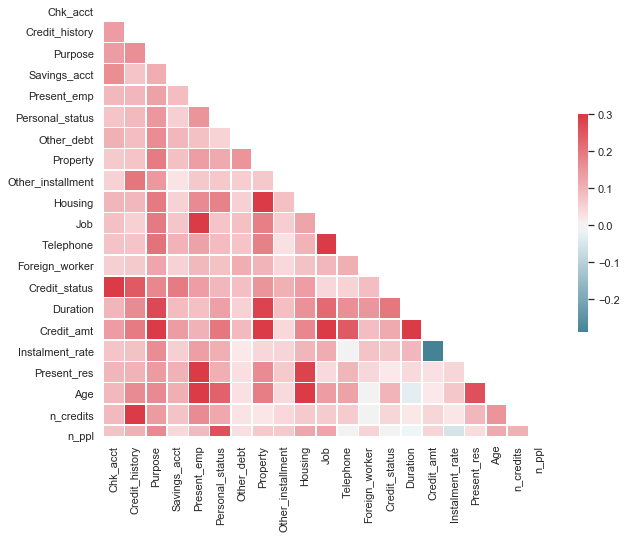

In [164]:
heatmap_matrix(corr_matrix)

## 7) Create New Features for Predictivity Improvement

In [165]:
# raw_data3 = raw_data2.copy()

# raw_data3['Duration*Credit_amt'] = raw_data3['Duration']*raw_data3['Credit_amt']
# raw_data3

# Section III - Variable Selection and Transformation

## 1) Binning Continuous Variables - Decision Tree Approach

In [166]:
cts_var

['Duration',
 'Credit_amt',
 'Instalment_rate',
 'Present_res',
 'Age',
 'n_credits',
 'n_ppl']

In [167]:
def decision_tree_binning(x, y, df, x_var):
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    tree_model.fit(x.to_frame(), y)
    df['tree_'+ x_var] = tree_model.predict_proba(x.to_frame())[:,1] 
    return tree_model

In [168]:
data_DTbinning = raw_data2.copy()
graph_list = []
bins_list = []

for i in cts_var:
    DT = decision_tree_binning(data_DTbinning[i], data_DTbinning['Credit_status'], data_DTbinning, i)
    
    #data.groupby(['tree_' + i])['Credit_status'].count().plot.bar(rot=20)
    
    bins = pd.concat([data_DTbinning.groupby(['tree_' + i])[i].min(),
                      data_DTbinning.groupby(['tree_' + i])[i].max()], axis=1)
    
    dot_data = tree.export_graphviz(DT, 
                                    feature_names=[i],
                                    #class_names = ['1','2'],
                                    filled=True)
    graph_list.append(pydotplus.graph_from_dot_data(dot_data))
    bins_list.append(bins)

In [169]:
# Checking limit buckets generated by the tree
for bins in bins_list:
    display(bins)

,Duration,Duration
tree_Duration,,
0.000000,0.00000,0.03125
0.119048,0.06250,0.12500
0.240625,0.15625,0.34375
0.310992,0.37500,0.68750
0.333333,0.81250,0.90625
0.428571,0.71875,0.75000
0.478528,1.00000,1.00000


,Credit_amt,Credit_amt
tree_Credit_amt,,
0.000000,0.000000,0.483695
0.100000,0.483839,0.525749
0.245614,0.725112,0.931795
0.276565,0.026266,0.473935
0.440476,0.525893,0.723820
0.471698,0.961362,1.000000
0.750000,0.934091,0.952606


,Instalment_rate,Instalment_rate
tree_Instalment_rate,,
0.250000,0.000000,0.000000
0.273543,0.333333,0.333333
0.287356,0.666667,0.666667
0.331906,1.000000,1.000000


,Present_res,Present_res
tree_Present_res,,
0.266667,0.666667,0.666667
0.299233,1.000000,1.000000
0.302521,0.000000,0.000000
0.322034,0.333333,0.333333


,Age,Age
tree_Age,,
0.153846,0.390244,0.414634
0.254795,0.439024,1.000000
0.275510,0.170732,0.195122
0.324723,0.219512,0.365854
0.357143,0.024390,0.048780
0.427350,0.073171,0.121951
0.463415,0.146341,0.146341
0.500000,0.000000,0.000000


,n_credits,n_credits
tree_n_credits,,
0.222222,0.666667,0.666667
0.274924,0.333333,0.333333
0.316038,0.000000,0.000000
0.333333,1.000000,1.000000


,n_ppl,n_ppl
tree_n_ppl,,
0.296552,1.0,1.0
0.300585,0.0,0.0


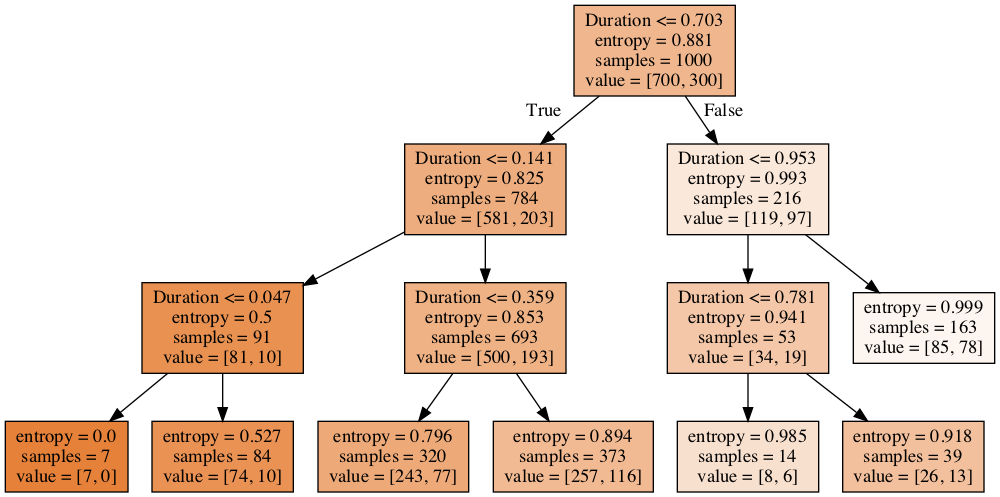

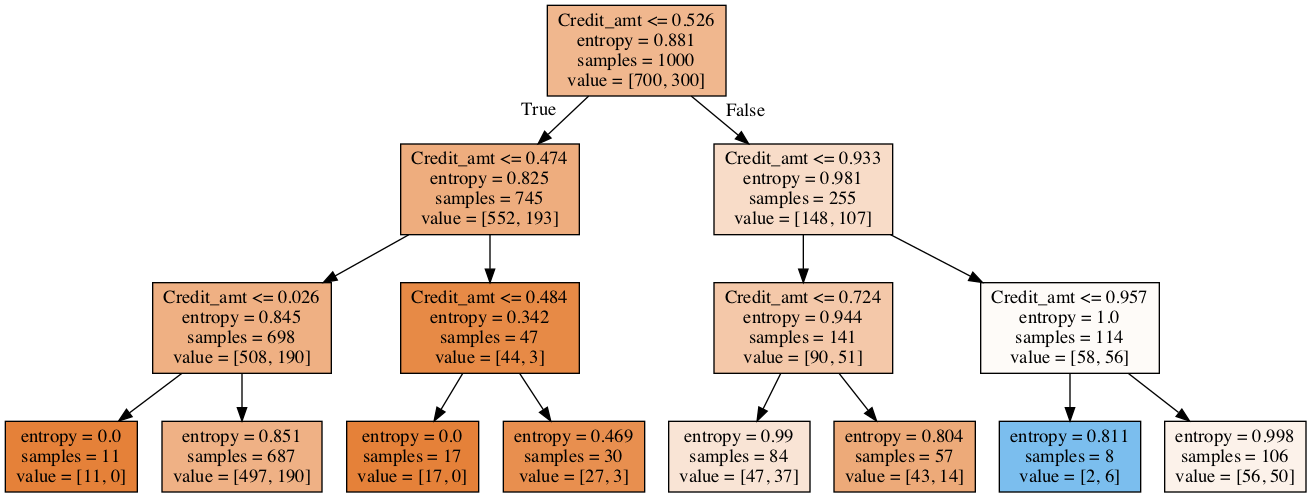

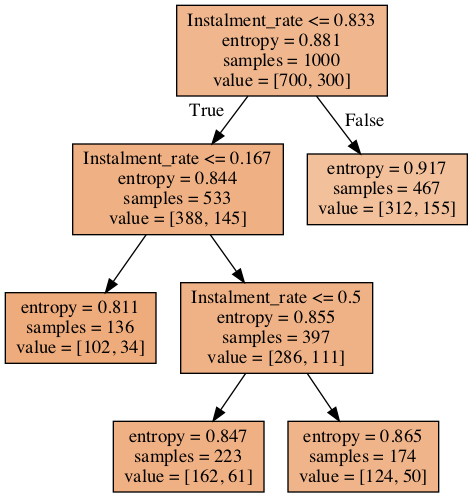

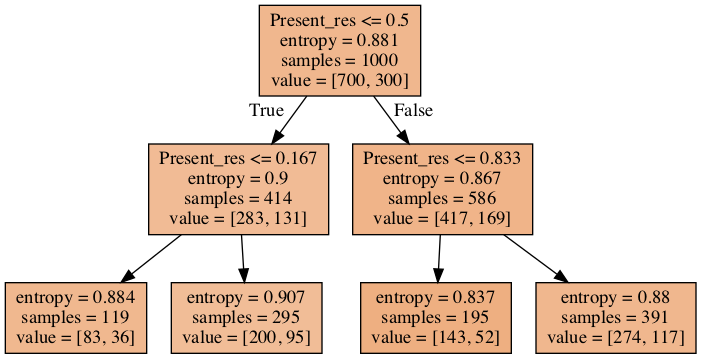

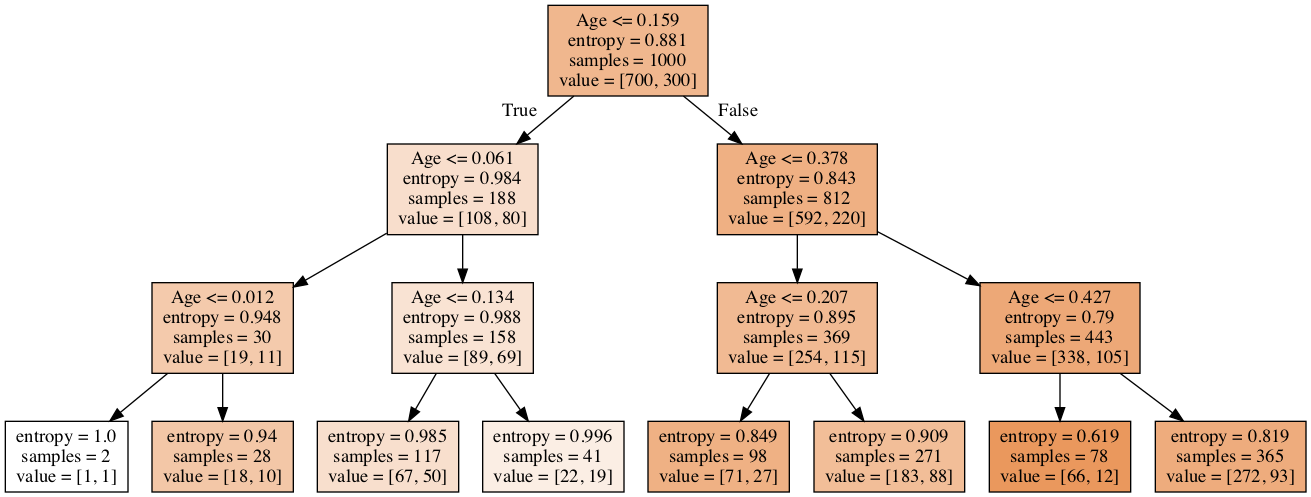

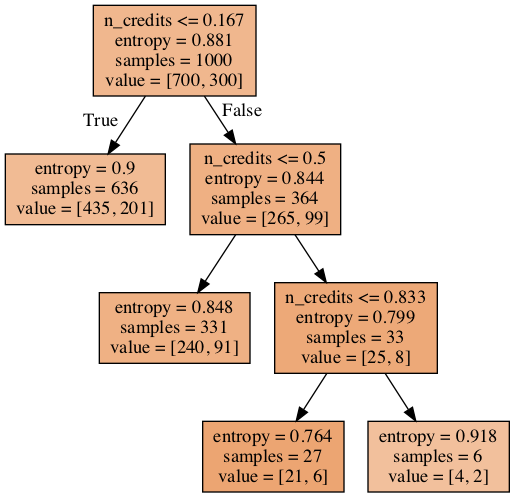

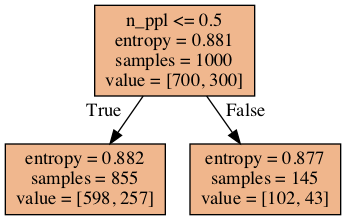

In [170]:
# Visualizing the tree
for graph in graph_list:
    display(Image(graph.create_png())) 

Text(0, 0.5, 'Credit_status')

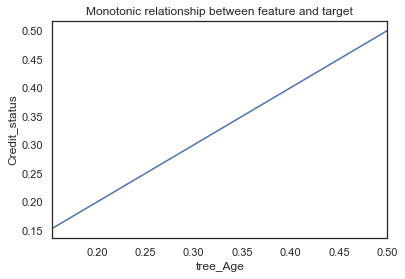

In [171]:
# check the monotonic relationship between the feature and target
# use Age as an example
fig_monotonic = plt.figure()
fig_monotonic = data_DTbinning.groupby(['tree_Age'])['Credit_status'].mean().plot()
fig_monotonic.set_title('Monotonic relationship between feature and target')
fig_monotonic.set_ylabel('Credit_status')

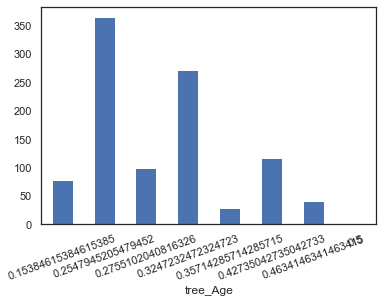

In [172]:
# check the number of appearance in each bucket/bin
# use Age as an example
data_DTbinning.groupby(['tree_Age'])['Credit_status'].count().plot.bar(rot=20)

In [173]:
data_DTbinning = data_DTbinning.drop(cts_var, axis=1)
data_DTbinning.head()

,Chk_acct,Credit_history,Purpose,Savings_acct,Present_emp,Personal_status,Other_debt,Property,Other_installment,Housing,...,Telephone,Foreign_worker,Credit_status,tree_Duration,tree_Credit_amt,tree_Instalment_rate,tree_Present_res,tree_Age,tree_n_credits,tree_n_ppl
1,chk_acc < 0 DM,critical account/other credits existing,radio/television,unknown/no savings account,emp >= 7 years,male: single,none,real estate,none,own,...,"yes, registered under the customer’s name",yes,0,0.119048,0.276565,0.331906,0.299233,0.254795,0.274924,0.300585
2,0 <= chk_acc < 200 DM,existing credits paid back duly till now,radio/television,savings_acct < 100 DM,1 <= emp < 4 years,female: divorced/separated/married,none,real estate,none,own,...,none,yes,1,0.478528,0.245614,0.273543,0.322034,0.427350,0.316038,0.300585
3,no chk_acc,critical account/other credits existing,education,savings_acct < 100 DM,4 <= emp < 7 years,male: single,none,real estate,none,own,...,none,yes,0,0.240625,0.276565,0.273543,0.266667,0.254795,0.316038,0.296552
4,chk_acc < 0 DM,existing credits paid back duly till now,furniture/equipment,savings_acct < 100 DM,4 <= emp < 7 years,male: single,guarantor,building society savings agreement/life insurance,none,for free,...,none,yes,0,0.478528,0.471698,0.273543,0.299233,0.254795,0.316038,0.296552
5,chk_acc < 0 DM,delay in paying off in the past,car (new),savings_acct < 100 DM,1 <= emp < 4 years,male: single,none,unknown/no property,none,for free,...,none,yes,1,0.310992,0.440476,0.287356,0.299233,0.254795,0.274924,0.300585


## 2) WOE and IV

In [174]:
def calculate_WOE_IV(df, feature, target):
    attr_info = []
    feature_attr = df[feature].unique()
    for i in range(len(feature_attr)):
        attribute = list(feature_attr)[i]
        attr_info.append({
            'Attribute/Bin': attribute,
            'All': df[df[feature]==attribute].count()[feature],
            'Default': df[(df[feature]==attribute) & (df[target]==1)].count()[feature],
            'Non-default': df[(df[feature]==attribute) & (df[target]==0)].count()[feature]    
        })
    
    df_woe = pd.DataFrame(attr_info)
    df_woe['Percent_Default'] = df_woe['Default'] / df_woe['Default'].sum()
    df_woe['Percent_Non-default'] = df_woe['Non-default'] / df_woe['Non-default'].sum()
    df_woe['WOE'] = np.log(df_woe['Percent_Non-default'] / df_woe['Percent_Default'])
    df_woe = df_woe.replace({'WOE': {np.inf: 0, -np.inf: 0}})
    df_woe['IV'] = (df_woe['Percent_Non-default']-df_woe['Percent_Default']) * df_woe['WOE']
    iv = df_woe['IV'].sum()
    
    df_woe = df_woe.sort_values(by='WOE')
    
    return df_woe, iv

In [175]:
estimation_var = [] #keep a final set of variables for estimation
lst_iv = []
lst_drop_iv = []
df_iv = pd.DataFrame(data_DTbinning.drop(['Credit_status'],axis=1).columns, columns=['Variable'])
df_woe = data_DTbinning.copy()

for col in data_DTbinning.drop(['Credit_status'],axis=1).columns:
    print('WOE & IV for column: {}'.format(col))
    df, iv = calculate_WOE_IV(data_DTbinning, col, 'Credit_status')
    
    # WOE transformation -> Question 3)
    df_woe[col] = df_woe[col].map(df.set_index('Attribute/Bin')['WOE'])
    
    # track IV of each variable
    lst_iv.append(iv)
    
    # track varibles that are used for estimation
    if iv >= 0.02:
        estimation_var.append(col)
        lst_drop_iv.append('-')
    else: 
        lst_drop_iv.append('YES')
    
    display(df)
    print('IV score: {:.2f}'.format(iv))
    print('\n')

# put all IV into the dataframe
df_iv.insert(1, 'IV', lst_iv)
df_iv.insert(2, 'Drop Variable?', lst_drop_iv)

WOE & IV for column: Chk_acct


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
0,chk_acc < 0 DM,268,132,136,0.440000,0.194286,-0.817445,0.200858
1,0 <= chk_acc < 200 DM,258,100,158,0.333333,0.225714,-0.389873,0.041958
3,chk_acc >= 200 DM,59,13,46,0.043333,0.065714,0.416394,0.009319
2,no chk_acc,415,55,360,0.183333,0.514286,1.031473,0.341368


IV score: 0.59


WOE & IV for column: Credit_history


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
3,no credits taken/all credits paid back duly,38,25,13,0.083333,0.018571,-1.501224,0.097222
4,all credits at this bank paid back duly,46,25,21,0.083333,0.030000,-1.021651,0.054488
2,delay in paying off in the past,83,28,55,0.093333,0.078571,-0.172169,0.002542
1,existing credits paid back duly till now,558,176,382,0.586667,0.545714,-0.072361,0.002963
0,critical account/other credits existing,275,46,229,0.153333,0.327143,0.757783,0.131710


IV score: 0.29


WOE & IV for column: Purpose


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,education,48,21,27,0.070000,0.038571,-0.595983,0.018731
3,car (new),223,86,137,0.286667,0.195714,-0.381664,0.034713
7,repairs,21,8,13,0.026667,0.018571,-0.361790,0.002929
6,domestic appliances,11,4,7,0.013333,0.010000,-0.287682,0.000959
8,others,11,4,7,0.013333,0.010000,-0.287682,0.000959
5,business,93,33,60,0.110000,0.085714,-0.249461,0.006058
2,furniture/equipment,174,53,121,0.176667,0.172857,-0.021799,0.000083
0,radio/television,314,74,240,0.246667,0.342857,0.329276,0.031673
4,car (used),96,16,80,0.053333,0.114286,0.762140,0.046454
9,retraining,9,1,8,0.003333,0.011429,1.232144,0.009974


IV score: 0.15


WOE & IV for column: Savings_acct


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,savings_acct < 100 DM,612,220,392,0.733333,0.560000,-0.269664,0.046742
4,100 <= savings_acct < 500 DM,99,33,66,0.110000,0.094286,-0.154151,0.002422
0,unknown/no savings account,180,31,149,0.103333,0.212857,0.722661,0.079149
2,500 <= savings_acct < 1000 DM,61,10,51,0.033333,0.072857,0.781943,0.030905
3,savings_acct >= 1000 DM,48,6,42,0.020000,0.060000,1.098612,0.043944


IV score: 0.20


WOE & IV for column: Present_emp


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
4,emp < 1 year,166,66,100,0.220000,0.142857,-0.431782,0.033309
3,unemployed,59,23,36,0.076667,0.051429,-0.399273,0.010077
1,1 <= emp < 4 years,370,116,254,0.386667,0.362857,-0.063554,0.001513
0,emp >= 7 years,241,59,182,0.196667,0.260000,0.279171,0.017681
2,4 <= emp < 7 years,164,36,128,0.120000,0.182857,0.421213,0.026476


IV score: 0.09


WOE & IV for column: Personal_status


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
2,male: divorced/separated,48,19,29,0.063333,0.041429,-0.424441,0.009297
1,female: divorced/separated/married,290,102,188,0.340000,0.268571,-0.235829,0.016845
0,male: single,576,157,419,0.523333,0.598571,0.134327,0.010107
3,male: married/widowed,86,22,64,0.073333,0.091429,0.220543,0.003991


IV score: 0.04


WOE & IV for column: Other_debt


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
2,co-applicant,41,18,23,0.060000,0.032857,-0.602175,1.634476e-02
0,none,907,272,635,0.906667,0.907143,0.000525,2.500344e-07
1,guarantor,52,10,42,0.033333,0.060000,0.587787,1.567431e-02


IV score: 0.03


WOE & IV for column: Property


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
2,unknown/no property,132,57,75,0.190000,0.107143,-0.572861,0.047466
3,car or other,383,122,261,0.406667,0.372857,-0.086798,0.002935
1,building society savings agreement/life insurance,221,68,153,0.226667,0.218571,-0.036368,0.000294
0,real estate,264,53,211,0.176667,0.301429,0.534268,0.066656


IV score: 0.12


WOE & IV for column: Other_installment


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,bank,135,55,80,0.183333,0.114286,-0.472604,0.032632
2,stores,44,17,27,0.056667,0.038571,-0.384674,0.006961
0,none,821,228,593,0.760000,0.847143,0.108551,0.009459


IV score: 0.05


WOE & IV for column: Housing


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,for free,103,43,60,0.143333,0.085714,-0.514153,0.029625
2,rent,165,65,100,0.216667,0.142857,-0.416515,0.030743
0,own,732,192,540,0.640000,0.771429,0.186776,0.024548


IV score: 0.08


WOE & IV for column: Job


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
2,management/self-employed/highly qualified empl...,148,51,97,0.170000,0.138571,-0.204413,0.006424
3,unemployed/unskilled - non-resident,22,7,15,0.023333,0.021429,-0.085158,0.000162
0,skilled employee/official,633,187,446,0.623333,0.637143,0.021912,0.000303
1,unskilled - resident,197,55,142,0.183333,0.202857,0.101196,0.001976


IV score: 0.01


WOE & IV for column: Telephone


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,none,630,200,430,0.666667,0.614286,-0.081830,0.004286
0,"yes, registered under the customer’s name",370,100,270,0.333333,0.385714,0.145954,0.007645


IV score: 0.01


WOE & IV for column: Foreign_worker


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
0,yes,967,297,670,0.99,0.957143,-0.033752,0.001109
1,no,33,3,30,0.01,0.042857,1.455287,0.047817


IV score: 0.05


WOE & IV for column: tree_Duration


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,0.478528,163,78,85,0.260000,0.121429,-0.761355,0.105502
5,0.428571,14,6,8,0.020000,0.011429,-0.559616,0.004797
4,0.333333,39,13,26,0.043333,0.037143,-0.154151,0.000954
3,0.310992,373,116,257,0.386667,0.367143,-0.051812,0.001012
6,0.000000,7,0,7,0.000000,0.010000,0.000000,0.000000
2,0.240625,320,77,243,0.256667,0.347143,0.301958,0.027320
0,0.119048,84,10,74,0.033333,0.105714,1.154182,0.083541


IV score: 0.22


WOE & IV for column: tree_Credit_amt


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
5,0.750000,8,6,2,0.020000,0.002857,-1.945910,0.033358
2,0.471698,106,50,56,0.166667,0.080000,-0.733969,0.063611
3,0.440476,84,37,47,0.123333,0.067143,-0.608068,0.034168
4,0.000000,28,0,28,0.000000,0.040000,0.000000,0.000000
0,0.276565,687,190,497,0.633333,0.710000,0.114268,0.008761
1,0.245614,57,14,43,0.046667,0.061429,0.274845,0.004057
6,0.100000,30,3,27,0.010000,0.038571,1.349927,0.038569


IV score: 0.18


WOE & IV for column: tree_Instalment_rate


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
0,0.331906,467,155,312,0.516667,0.445714,-0.147720,0.010481
2,0.287356,174,50,124,0.166667,0.177143,0.060961,0.000639
1,0.273543,223,61,162,0.203333,0.231429,0.129425,0.003636
3,0.250000,136,34,102,0.113333,0.145714,0.251314,0.008138


IV score: 0.02


WOE & IV for column: tree_Present_res


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
1,0.322034,295,95,200,0.316667,0.285714,-0.102857,0.003184
3,0.302521,119,36,83,0.120000,0.118571,-0.011976,0.000017
0,0.299233,391,117,274,0.390000,0.391429,0.003656,0.000005
2,0.266667,195,52,143,0.173333,0.204286,0.164303,0.005086


IV score: 0.01


WOE & IV for column: tree_Age


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
7,0.500000,2,1,1,0.003333,0.001429,-0.847298,0.001614
4,0.463415,41,19,22,0.063333,0.031429,-0.700694,0.022355
1,0.427350,117,50,67,0.166667,0.095714,-0.554628,0.039352
6,0.357143,28,10,18,0.033333,0.025714,-0.259511,0.001977
3,0.324723,271,88,183,0.293333,0.261429,-0.115149,0.003674
5,0.275510,98,27,71,0.090000,0.101429,0.119545,0.001366
0,0.254795,365,93,272,0.310000,0.388571,0.225905,0.017750
2,0.153846,78,12,66,0.040000,0.094286,0.857450,0.046547


IV score: 0.13


WOE & IV for column: tree_n_credits


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
3,0.333333,6,2,4,0.006667,0.005714,-0.154151,0.000147
1,0.316038,636,201,435,0.670000,0.621429,-0.075257,0.003655
0,0.274924,331,91,240,0.303333,0.342857,0.122482,0.004841
2,0.222222,27,6,21,0.020000,0.030000,0.405465,0.004055


IV score: 0.01


WOE & IV for column: tree_n_ppl


,Attribute/Bin,All,Default,Non-default,Percent_Default,Percent_Non-default,WOE,IV
0,0.300585,855,257,598,0.856667,0.854286,-0.002783,0.000007
1,0.296552,145,43,102,0.143333,0.145714,0.016475,0.000039


IV score: 0.00




In [176]:
df_iv

,Variable,IV,Drop Variable?
0,Chk_acct,0.593503,-
1,Credit_history,0.288925,-
2,Purpose,0.152534,-
3,Savings_acct,0.203163,-
4,Present_emp,0.089056,-
5,Personal_status,0.040239,-
6,Other_debt,0.032019,-
7,Property,0.117351,-
8,Other_installment,0.049052,-
9,Housing,0.084915,-


In [177]:
estimation_var

['Chk_acct',
 'Credit_history',
 'Purpose',
 'Savings_acct',
 'Present_emp',
 'Personal_status',
 'Other_debt',
 'Property',
 'Other_installment',
 'Housing',
 'Foreign_worker',
 'tree_Duration',
 'tree_Credit_amt',
 'tree_Instalment_rate',
 'tree_Age']

## 3) Use the WOEs as model inputs

In [178]:
# combine categories/attributes with similar WOE values and replace categories/attributes with WOE values
# use WOE values rather than input values in the model

df_WOE = df_woe.copy()
df_WOE = df_WOE.drop(['Job', 'Telephone', 'tree_Present_res', 'tree_n_credits', 'tree_n_ppl'], axis=1)
df_WOE = df_WOE.add_prefix('WOE_')
df_WOE = df_WOE.rename(columns={'WOE_tree_Duration': 'WOE_Duration', 
                                'WOE_tree_Credit_amt': 'WOE_Credit_amt',
                                'WOE_tree_Instalment_rate': 'WOE_Instalment_rate',
                                'WOE_tree_Age': 'WOE_Age',
                                'WOE_Credit_status': 'Credit_status'})

df_WOE

,WOE_Chk_acct,WOE_Credit_history,WOE_Purpose,WOE_Savings_acct,WOE_Present_emp,WOE_Personal_status,WOE_Other_debt,WOE_Property,WOE_Other_installment,WOE_Housing,WOE_Foreign_worker,Credit_status,WOE_Duration,WOE_Credit_amt,WOE_Instalment_rate,WOE_Age
1,-0.817445,0.757783,0.329276,0.722661,0.279171,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,0,1.154182,0.114268,-0.147720,0.225905
2,-0.389873,-0.072361,0.329276,-0.269664,-0.063554,-0.235829,0.000525,0.534268,0.108551,0.186776,-0.033752,1,-0.761355,0.274845,0.129425,-0.554628
3,1.031473,0.757783,-0.595983,-0.269664,0.421213,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,0,0.301958,0.114268,0.129425,0.225905
4,-0.817445,-0.072361,-0.021799,-0.269664,0.421213,0.134327,0.587787,-0.036368,0.108551,-0.514153,-0.033752,0,-0.761355,-0.733969,0.129425,0.225905
5,-0.817445,-0.172169,-0.381664,-0.269664,-0.063554,0.134327,0.000525,-0.572861,0.108551,-0.514153,-0.033752,1,-0.051812,-0.608068,0.060961,0.225905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.031473,-0.072361,-0.021799,-0.269664,0.421213,-0.235829,0.000525,0.534268,0.108551,0.186776,-0.033752,0,0.301958,0.114268,0.060961,-0.115149
997,-0.817445,-0.072361,0.762140,-0.269664,-0.063554,-0.424441,0.000525,-0.036368,0.108551,0.186776,-0.033752,0,-0.051812,1.349927,-0.147720,-0.115149
998,1.031473,-0.072361,0.329276,-0.269664,0.279171,0.134327,0.000525,-0.086798,0.108551,0.186776,-0.033752,0,0.301958,0.114268,-0.147720,0.225905
999,-0.817445,-0.072361,0.329276,-0.269664,-0.063554,0.134327,0.000525,-0.572861,0.108551,-0.514153,-0.033752,1,-0.761355,0.114268,-0.147720,-0.554628


## 4) Correlation matrix (All varibles are continuous)

In [179]:
corr_matrix_WOE = df_WOE.drop(['Credit_status'], axis=1).corr()
corr_matrix_WOE

,WOE_Chk_acct,WOE_Credit_history,WOE_Purpose,WOE_Savings_acct,WOE_Present_emp,WOE_Personal_status,WOE_Other_debt,WOE_Property,WOE_Other_installment,WOE_Housing,WOE_Foreign_worker,WOE_Duration,WOE_Credit_amt,WOE_Instalment_rate,WOE_Age
WOE_Chk_acct,1.000000,0.199875,0.087416,0.215644,0.116421,0.060526,-0.041787,0.062138,0.033426,0.117305,-0.010315,0.051424,0.042283,-0.017758,0.124454
WOE_Credit_history,0.199875,1.000000,0.002436,0.052248,0.111510,0.031272,-0.043501,0.062433,0.162144,0.089819,0.036685,0.096397,0.089251,-0.049039,0.104917
WOE_Purpose,0.087416,0.002436,1.000000,0.073485,0.066801,0.068431,0.051435,0.005922,0.041319,0.008726,-0.055778,-0.038681,0.005803,0.000249,-0.019647
WOE_Savings_acct,0.215644,0.052248,0.073485,1.000000,0.101570,0.024761,-0.040102,0.008357,0.008532,0.012148,-0.011215,0.023002,-0.019306,-0.032527,0.117219
WOE_Present_emp,0.116421,0.111510,0.066801,0.101570,1.000000,0.183150,0.033741,-0.060869,-0.012530,0.020697,-0.033772,-0.063123,-0.008111,-0.073427,0.170116
WOE_Personal_status,0.060526,0.031272,0.068431,0.024761,0.183150,1.000000,0.011340,-0.047753,-0.079635,0.052605,0.059558,-0.045634,-0.046945,-0.083945,0.144387
WOE_Other_debt,-0.041787,-0.043501,0.051435,-0.040102,0.033741,0.011340,1.000000,0.138404,-0.044773,0.045978,0.065717,0.074068,0.023302,-0.002958,-0.024093
WOE_Property,0.062138,0.062433,0.005922,0.008357,-0.060869,-0.047753,0.138404,1.000000,0.062608,0.313256,0.090383,0.213087,0.154417,0.035190,-0.064987
WOE_Other_installment,0.033426,0.162144,0.041319,0.008532,-0.012530,-0.079635,-0.044773,0.062608,1.000000,-0.017182,0.010395,0.041002,0.073854,0.004220,-0.010137
WOE_Housing,0.117305,0.089819,0.008726,0.012148,0.020697,0.052605,0.045978,0.313256,-0.017182,1.000000,0.004672,0.079521,0.014942,-0.032712,0.049436


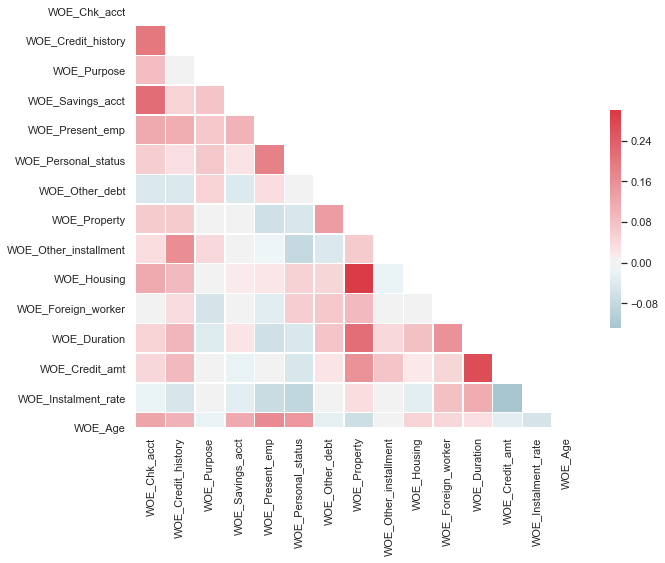

In [180]:
heatmap_matrix(corr_matrix_WOE)

# Section IV - Estimation

In [181]:
# Use 15 varibles for estimation (based on IV)
X = df_WOE.copy()
y = X['Credit_status']

X = X.drop(['Credit_status'], axis=1)
X

,WOE_Chk_acct,WOE_Credit_history,WOE_Purpose,WOE_Savings_acct,WOE_Present_emp,WOE_Personal_status,WOE_Other_debt,WOE_Property,WOE_Other_installment,WOE_Housing,WOE_Foreign_worker,WOE_Duration,WOE_Credit_amt,WOE_Instalment_rate,WOE_Age
1,-0.817445,0.757783,0.329276,0.722661,0.279171,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,1.154182,0.114268,-0.147720,0.225905
2,-0.389873,-0.072361,0.329276,-0.269664,-0.063554,-0.235829,0.000525,0.534268,0.108551,0.186776,-0.033752,-0.761355,0.274845,0.129425,-0.554628
3,1.031473,0.757783,-0.595983,-0.269664,0.421213,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,0.301958,0.114268,0.129425,0.225905
4,-0.817445,-0.072361,-0.021799,-0.269664,0.421213,0.134327,0.587787,-0.036368,0.108551,-0.514153,-0.033752,-0.761355,-0.733969,0.129425,0.225905
5,-0.817445,-0.172169,-0.381664,-0.269664,-0.063554,0.134327,0.000525,-0.572861,0.108551,-0.514153,-0.033752,-0.051812,-0.608068,0.060961,0.225905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.031473,-0.072361,-0.021799,-0.269664,0.421213,-0.235829,0.000525,0.534268,0.108551,0.186776,-0.033752,0.301958,0.114268,0.060961,-0.115149
997,-0.817445,-0.072361,0.762140,-0.269664,-0.063554,-0.424441,0.000525,-0.036368,0.108551,0.186776,-0.033752,-0.051812,1.349927,-0.147720,-0.115149
998,1.031473,-0.072361,0.329276,-0.269664,0.279171,0.134327,0.000525,-0.086798,0.108551,0.186776,-0.033752,0.301958,0.114268,-0.147720,0.225905
999,-0.817445,-0.072361,0.329276,-0.269664,-0.063554,0.134327,0.000525,-0.572861,0.108551,-0.514153,-0.033752,-0.761355,0.114268,-0.147720,-0.554628


In [182]:
# randomly sample 70% of the data as training set and keep the rest of 30% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [183]:
X_train

,WOE_Chk_acct,WOE_Credit_history,WOE_Purpose,WOE_Savings_acct,WOE_Present_emp,WOE_Personal_status,WOE_Other_debt,WOE_Property,WOE_Other_installment,WOE_Housing,WOE_Foreign_worker,WOE_Duration,WOE_Credit_amt,WOE_Instalment_rate,WOE_Age
106,-0.389873,0.757783,-0.287682,-0.269664,-0.063554,0.134327,-0.602175,-0.086798,0.108551,0.186776,-0.033752,-0.051812,-0.733969,0.129425,0.225905
69,1.031473,-0.072361,-0.595983,-0.269664,-0.063554,0.134327,0.000525,-0.572861,-0.384674,-0.514153,-0.033752,-0.761355,0.114268,-0.147720,0.225905
480,-0.817445,0.757783,-0.021799,-0.269664,0.279171,0.134327,0.000525,-0.086798,0.108551,0.186776,-0.033752,0.301958,0.114268,-0.147720,0.225905
400,1.031473,0.757783,0.329276,1.098612,-0.063554,-0.235829,0.000525,0.534268,0.108551,0.186776,-0.033752,-0.051812,0.114268,-0.147720,0.225905
435,-0.817445,-0.072361,-0.021799,-0.269664,-0.063554,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,0.301958,0.114268,0.060961,-0.700694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-0.817445,-1.501224,-0.381664,-0.269664,-0.063554,0.134327,0.000525,-0.086798,-0.472604,0.186776,-0.033752,0.301958,0.114268,-0.147720,0.225905
193,-0.389873,-0.072361,-0.249461,-0.269664,-0.063554,0.134327,0.000525,-0.086798,0.108551,0.186776,-0.033752,-0.559616,-0.608068,-0.147720,0.857450
630,1.031473,-0.072361,-0.595983,-0.269664,0.279171,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,0.301958,1.349927,0.251314,0.225905
560,-0.389873,0.757783,-0.021799,-0.269664,-0.431782,0.134327,0.000525,0.534268,0.108551,0.186776,-0.033752,-0.051812,0.114268,0.129425,-0.115149


## 1) Logistic Regression

### Logistic Function using Newton's Method

In [184]:
from numpy.linalg import inv

def logit(X, y, max_iter, fit_intercept=1):
    tol = 1/np.power(10, 11)
    change = tol+1
    
    N = X.shape[0] #number of instances
    if fit_intercept:
        K = X.shape[1]+1 #number of varibles (include one constant for intercept)
        intercept = np.ones((N, 1)) #add a vector of ones to X to be multiplied with intercept term if fit_intercept=1 
        X = np.c_[intercept, X]
    else:
        X = X.to_numpy() #convert to numpy narray
        K = X.shape[1]
    
    # initialize coefficiant(b) and score(bx) vectors
    b = np.zeros(K)
    score = np.zeros(N)
    if fit_intercept:
        y_bar = np.mean(y)
        b[0] = np.log(y_bar/(1-y_bar))  
    for i in range(N):
        score[i]=b[0]
    
    # initialize variables used in the Newton method
    lambda_ = np.zeros(N)
    lnl_ = np.zeros(max_iter)
    
    iter_ = 1
    while abs(change) > tol and iter_ < max_iter:
        # print('iter: ', iter_, ' change: ', change)
        iter_ += 1
        
        # reset gradient and hesse for each iteration
        gradient_ = np.zeros(K)
        hesse_ = np.zeros((K,K))
        
        # Compute prediction lambda_, gradient gradient_, Hessian hesse_, and log likelihood lnl_
        for i in range(N):
            x_i = X[i] #K*1
            y_i = y.iloc[i] #float
            lambda_[i] = 1 / (1 + np.exp(-np.dot(x_i.T, b))) #N*1
            
            for j in range(K):
                x_i_j = X[i, j] #float
                gradient_[j] = gradient_[j] + (y_i-lambda_[i])*x_i_j
                
                for jj in range(K):
                    x_i_jj = X[i, jj] #float
                    hesse_[jj,j] = hesse_[jj,j] - lambda_[i] * (1-lambda_[i]) * x_i_jj * x_i_j
            
            lnl_[iter_] = lnl_[iter_] + y_i*np.log(lambda_[i]) + (1-y_i)*np.log(1-lambda_[i])
        
        # take inverse of Hessian
        hesse_inv = inv(hesse_) #K*K
        hesse_invg = np.dot(hesse_inv, gradient_) #K*1
        
        change = lnl_[iter_] - lnl_[iter_-1]
        
        # if convergent, exit and keep b corresponding with the estimated hessian
        if abs(change) <= tol:
            break
        
        # apply Newton's scheme for updating coefficient/weight vector (b)
        for j in range(K):
            b[j] = b[j] - hesse_invg[j]
         
        # compute the new score (bx)
        for i in range(N):
            score[i] = 0
            for j in range(K):
                score[i] = score[i] + b[j] * x_i_j
    
    return b, hesse_inv

### Computing Statistics After Estimation

In [185]:
def logit_statistics(b_opt, Hinv_opt, X, fit_intercept=1): #note: k variables vs (k+1) coeff. estimated by logit if intercept is included
    lst_col = list(X.columns.values) 
    if fit_intercept:
        lst_col.insert(0, 'Intercept')
    dict_pvalue = {}
    all_signif = True
    
    for j in range(len(lst_col)): 
        col = lst_col[j] #jth variable
        
        b = b_opt[j]
        SE = np.sqrt(-Hinv_opt[j,j])
        t = b/SE
        pvalue = 2*(1 - stats.norm.cdf(abs(t)))
        
        if pvalue <= 0.05:
            dict_pvalue[col] = pvalue
        else:
            all_signif = False
    
    return dict_pvalue, all_signif

### Selecting Significant Varibles

In [186]:
# loop until all the variables are significant at the 5% level

def logit_var_select(X_train, X_test, y_train, max_iter, fit_intercept=1):
    while True:
        b_opt, Hinv_opt = logit(X_train, y_train, max_iter, fit_intercept=1)
        dict_pvalue, all_signif = logit_statistics(b_opt, Hinv_opt, X_train, fit_intercept=1)
        signif_var = list(dict_pvalue.keys())
        if fit_intercept:
            signif_var.remove('Intercept')
        
        if all_signif:
            break
        
        # update varibles in the training X and test X
        X_train = X_train[signif_var]
        X_test = X_test[signif_var]
        
    return signif_var, X_train, X_test, b_opt, dict_pvalue

In [187]:
signif_var_logit, X_train_logit, X_test_logit, b_logit, pvalues_logit = logit_var_select(X_train, X_test, y_train, 50, fit_intercept=1)

# final chosen variables
signif_var_logit

['WOE_Chk_acct',
 'WOE_Credit_history',
 'WOE_Purpose',
 'WOE_Savings_acct',
 'WOE_Present_emp',
 'WOE_Other_debt',
 'WOE_Property',
 'WOE_Duration',
 'WOE_Credit_amt',
 'WOE_Instalment_rate']

In [188]:
# validate: all p-values are less than 0.05
pvalues_logit

{'Intercept': 2.220446049250313e-16,
 'WOE_Chk_acct': 2.8514746119867596e-11,
 'WOE_Credit_history': 1.974034318674711e-06,
 'WOE_Purpose': 1.857816799466505e-05,
 'WOE_Savings_acct': 0.004585641335330237,
 'WOE_Present_emp': 0.0032621798325240814,
 'WOE_Other_debt': 0.021255394472888156,
 'WOE_Property': 0.008779821757839201,
 'WOE_Duration': 0.0003522264066420089,
 'WOE_Credit_amt': 0.0006471945441035576,
 'WOE_Instalment_rate': 0.0037626395828516124}

In [189]:
# All coefficients are negative, which makes sense because:

# (0) Intercept
# (1) Chk_acct
# (2) Credit_history
# (3) Purpose
# (4) Savings_acct
# (5) Present_emp
# (6) Other_debt 
# (7) Property
# (8) Duration
# (9) Credit_amt
# (10) Instalment_rate

b_logit

array([-0.8223918 , -0.85449325, -0.87922374, -1.07788685, -0.64281206,
       -0.97664789, -1.25341659, -0.77741154, -0.83246008, -0.88457598,
       -1.9755394 ])

### In-sample Prediction

In [190]:
# new training set
X_train_logit

,WOE_Chk_acct,WOE_Credit_history,WOE_Purpose,WOE_Savings_acct,WOE_Present_emp,WOE_Other_debt,WOE_Property,WOE_Duration,WOE_Credit_amt,WOE_Instalment_rate
106,-0.389873,0.757783,-0.287682,-0.269664,-0.063554,-0.602175,-0.086798,-0.051812,-0.733969,0.129425
69,1.031473,-0.072361,-0.595983,-0.269664,-0.063554,0.000525,-0.572861,-0.761355,0.114268,-0.147720
480,-0.817445,0.757783,-0.021799,-0.269664,0.279171,0.000525,-0.086798,0.301958,0.114268,-0.147720
400,1.031473,0.757783,0.329276,1.098612,-0.063554,0.000525,0.534268,-0.051812,0.114268,-0.147720
435,-0.817445,-0.072361,-0.021799,-0.269664,-0.063554,0.000525,0.534268,0.301958,0.114268,0.060961
...,...,...,...,...,...,...,...,...,...,...
836,-0.817445,-1.501224,-0.381664,-0.269664,-0.063554,0.000525,-0.086798,0.301958,0.114268,-0.147720
193,-0.389873,-0.072361,-0.249461,-0.269664,-0.063554,0.000525,-0.086798,-0.559616,-0.608068,-0.147720
630,1.031473,-0.072361,-0.595983,-0.269664,0.279171,0.000525,0.534268,0.301958,1.349927,0.251314
560,-0.389873,0.757783,-0.021799,-0.269664,-0.431782,0.000525,0.534268,-0.051812,0.114268,0.129425


In [191]:
# new test set
X_test_logit

,WOE_Chk_acct,WOE_Credit_history,WOE_Purpose,WOE_Savings_acct,WOE_Present_emp,WOE_Other_debt,WOE_Property,WOE_Duration,WOE_Credit_amt,WOE_Instalment_rate
994,-0.817445,-0.072361,-0.021799,-0.269664,-0.399273,0.000525,-0.086798,-0.761355,-0.608068,-0.147720
860,1.031473,-0.072361,-0.381664,-0.154151,-0.063554,0.587787,0.534268,0.301958,0.000000,0.251314
299,1.031473,-0.072361,-0.021799,-0.269664,-0.063554,0.000525,0.534268,-0.051812,0.114268,0.060961
554,-0.389873,0.757783,-0.381664,-0.154151,-0.431782,0.000525,-0.086798,0.301958,0.114268,-0.147720
673,1.031473,-0.072361,-0.381664,-0.269664,0.279171,0.000525,-0.036368,-0.761355,-0.733969,0.129425
...,...,...,...,...,...,...,...,...,...,...
168,-0.389873,-0.072361,-0.021799,1.098612,-0.431782,0.000525,0.534268,0.301958,0.114268,-0.147720
999,-0.817445,-0.072361,0.329276,-0.269664,-0.063554,0.000525,-0.572861,-0.761355,0.114268,-0.147720
985,1.031473,0.757783,-0.021799,-0.269664,0.421213,0.000525,-0.036368,-0.051812,0.114268,0.129425
492,-0.389873,-1.501224,-0.249461,-0.269664,0.279171,0.000525,-0.572861,-0.559616,-0.733969,0.129425


In [192]:
# predict default prob.
def logit_predict_prob(X, b, fit_intercept=1):  
    if fit_intercept:
        intercept = np.ones((X.shape[0], 1)) #add a vector of ones to X to be multiplied with intercept term if fit_intercept=1 
        X = np.c_[intercept, X]
    exp_score = np.exp(np.dot(b, X.T))
    prob = exp_score/(1+exp_score)
    return prob

### ROC Curve for the in-sample prediction

In [193]:
# ROC curve is a plot of the true positive rate against the false positive rate
# It shows the tradeoff between sensitivity and specificity

def ROC_plot(y, y_pred_prob):
    # AUC score
    lr_auc = metrics.roc_auc_score(y, y_pred_prob)
    # ROC curve
    lr_fpr, lr_tpr, _ = metrics.roc_curve(y, y_pred_prob)

    # plot the roc curve for the model
    plt.figure(figsize=(7,5))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC curve (area = %0.3f)' % lr_auc)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    # show the legend
    plt.legend()
    # show the title
    plt.title('Receiver Operating Characteristic (ROC)')
    # show the plot
    plt.show()
    
    return lr_auc

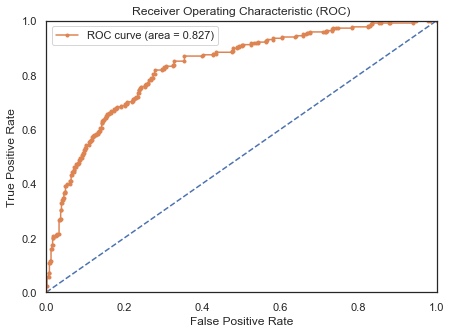

In [194]:
# predict in-sample probabilities
y_pred_logit_insample = logit_predict_prob(X_train_logit, b_logit, fit_intercept=1)

# plot ROC curve
AUC_logit_insample = ROC_plot(y_train, y_pred_logit_insample)

### KS Test - Choose Cutoff Value

In [195]:
def KS_test(y, y_pred_prob):
    # choose the threshold where fpr and tpr differ the most as the cutoff value
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_prob)
    diff = tpr-fpr
    opt_idx = np.argmax(diff)
    opt_threshold = thresholds[opt_idx]
    KS_statistic = diff[opt_idx]
    
    # visualize in the graph
    plt.figure(figsize=(7,5))
    fpr_line, = plt.plot(thresholds, fpr, label='False Positive Rate')
    tpr_line, = plt.plot(thresholds, tpr, label='True Positive Rate')
    plt.axvline(x=opt_threshold, color='r', linestyle='--', label='Cutoff') #the cutoff line
    plt.xlim(0, 1)
    plt.legend(handles=[fpr_line, tpr_line])
    plt.show()
    
    print("Maximum KS is " + str(np.round(KS_statistic,3)) + "%")
    print("Cut-off value is chosen as " + str(np.round(opt_threshold,3)))
    return opt_threshold, KS_statistic

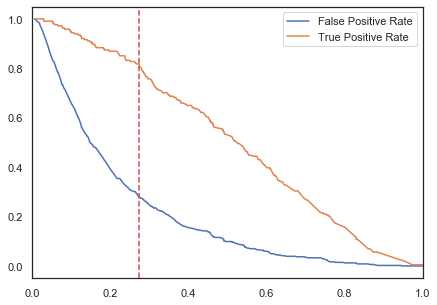

Maximum KS is 0.54%
Cut-off value is chosen as 0.274


In [196]:
cutoff_logit, KS_logit = KS_test(y_train, y_pred_logit_insample)

In [197]:
cutoff_logit

0.27402042564824564

### Optional: Compare Logistic Regression Results with Sklearn Built-in Package

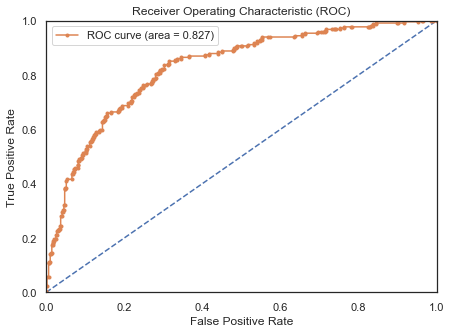

In [198]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# using LogisticRegression package 

# fit a model
lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(X_train_logit, y_train)
# predict in-sample probabilities
lr_probs = lr_model.predict_proba(X_train_logit)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate score
lr_auc = metrics.roc_auc_score(y_train, lr_probs)
# roc curve
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC curve (area = %0.3f)' % lr_auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
# show the legend
plt.legend()
# show the title
plt.title('Receiver Operating Characteristic (ROC)')
# show the plot
plt.show()

In [199]:
lr_model.intercept_

array([-0.80566944])

In [200]:
lr_model.coef_

array([[-0.83685147, -0.83434041, -1.00786955, -0.59659262, -0.86668254,
        -0.97788276, -0.73770334, -0.80489868, -0.78345107, -1.31745739]])

In [201]:
'''So, results are consistent in terms of using our user-defined logit function & sklearn package'''

'So, results are consistent in terms of using our user-defined logit function & sklearn package'

## 2) Stepwise Logistic Regression - Backward Selection

### Using P-value

In [202]:
def swlogit_statistics(b_opt, Hinv_opt, X, fit_intercept=1): #note: k variables vs (k+1) coeff. estimated by logit if intercept is included
    lst_col = list(X.columns.values) 
    if fit_intercept:
        lst_col.insert(0, 'Intercept')
    dict_pvalue = {}
    all_signif = True
    
    for j in range(len(lst_col)): 
        col = lst_col[j] #jth variable
        
        b = b_opt[j]
        SE = np.sqrt(-Hinv_opt[j,j])
        t = b/SE
        pvalue = 2*(1 - stats.norm.cdf(abs(t)))
        
        dict_pvalue[col] = pvalue
        if pvalue > 0.05:
            all_signif = False
    
    return dict_pvalue, all_signif

In [203]:
# start from the full model containing all 𝑘 predictors/variables
# remove one insignificant varible at per iteration
# loop until all the variables are significant at the 5% level

def swlogit_var_select(X_train, X_test, y_train, max_iter, fit_intercept=1):
    while True:
        b_opt, Hinv_opt = logit(X_train, y_train, max_iter, fit_intercept=1)
        dict_pvalue, all_signif = swlogit_statistics(b_opt, Hinv_opt, X_train, fit_intercept=1)
        signif_var = list(dict_pvalue.keys())
        
        # find the largest p-value, if it's larger than 0.05 -> remove it
        max_value = max(dict_pvalue.values())
        if max_value > 0.05:
            max_key = max(dict_pvalue, key=lambda k: dict_pvalue[k])
            signif_var.remove(max_key)
        
        if fit_intercept:
            signif_var.remove('Intercept')
        
        if all_signif:
            break
        
        # update varibles in the training X and test X
        X_train = X_train[signif_var]
        X_test = X_test[signif_var]
        
    return signif_var, X_train, X_test, b_opt, dict_pvalue

In [204]:
signif_var_swlogit, X_train_swlogit, X_test_swlogit, b_swlogit, pvalues_swlogit = swlogit_var_select(X_train, X_test, y_train, 50, fit_intercept=1)

# final chosen variables
signif_var_swlogit  #get one extra varible Personal_status compared to logistic regression

['WOE_Chk_acct',
 'WOE_Credit_history',
 'WOE_Purpose',
 'WOE_Savings_acct',
 'WOE_Present_emp',
 'WOE_Other_debt',
 'WOE_Property',
 'WOE_Duration',
 'WOE_Credit_amt',
 'WOE_Instalment_rate']

In [205]:
# validate: all p-values are less than 0.05
pvalues_swlogit

{'Intercept': 2.220446049250313e-16,
 'WOE_Chk_acct': 2.8514746119867596e-11,
 'WOE_Credit_history': 1.974034318674711e-06,
 'WOE_Purpose': 1.857816799466505e-05,
 'WOE_Savings_acct': 0.004585641335330237,
 'WOE_Present_emp': 0.0032621798325240814,
 'WOE_Other_debt': 0.021255394472888156,
 'WOE_Property': 0.008779821757839201,
 'WOE_Duration': 0.0003522264066420089,
 'WOE_Credit_amt': 0.0006471945441035576,
 'WOE_Instalment_rate': 0.0037626395828516124}

In [206]:
# All coefficients are negative, which makes sense because:

# (0) Intercept
# (1) Chk_acct
# (2) Credit_history
# (3) Purpose
# (4) Savings_acct
# (5) Present_emp
# (6) Other_debt 
# (7) Property
# (8) Duration
# (9) Credit_amt
# (10) Instalment_rate

b_swlogit

array([-0.8223918 , -0.85449325, -0.87922374, -1.07788685, -0.64281206,
       -0.97664789, -1.25341659, -0.77741154, -0.83246008, -0.88457598,
       -1.9755394 ])

In [207]:
'''Note: by setting random_state=0, every split will be always the same, 
so in this case, logistic and stepwise logictis have the same performance'''

'Note: by setting random_state=0, every split will be always the same, \nso in this case, logistic and stepwise logictis have the same performance'

### KS Test - Choose Cutoff Value

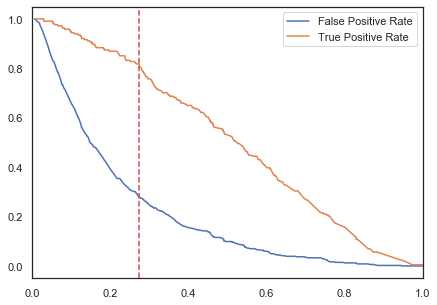

Maximum KS is 0.54%
Cut-off value is chosen as 0.274


In [208]:
y_pred_swlogit_insample = logit_predict_prob(X_train_swlogit, b_swlogit, fit_intercept=1)
cutoff_swlogit, KS_swlogit = KS_test(y_train, y_pred_swlogit_insample)

In [209]:
cutoff_swlogit

0.27402042564824564

## 3) Decision Tree

In [210]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [211]:
def Pruning(trainx, trainy):
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
    path = clf.cost_complexity_pruning_path(trainx, trainy)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    return ccp_alphas, impurities

In [212]:
from sklearn.model_selection import KFold

def optimal_alpha(x, y, k):
    kfold = KFold(n_splits=k)
    alpha_dict = {}
    clfs_list = []
    
    # for k = 1,...,10, using every fold except the kth
    for train_index, test_index in kfold.split(x):
        clfs = []
        trainX, testX = x[train_index], x[test_index]
        trainY, testY = y[train_index], y[test_index]
        ccp_alphas, impurities = Pruning(trainX, trainY)
        
        # construct a sequence of trees T1 , . . . , Tm for a range of values of alpha
        for ccp_alpha in ccp_alphas:
            decision_tree = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha, random_state=0)
            decision_tree.fit(trainX, trainY)
            clfs.append(decision_tree)
        # for each tree Ti, calculate the RSS or score on the test set
        test_scores = [clf.score(testX, testY) for clf in clfs]
        max_scores = max(test_scores)
        ind = test_scores.index(max_scores)
        alpha = ccp_alphas[ind]
        alpha_dict[alpha] = max_scores
#         print("Number of nodes in the optimal tree is: {} with ccp_alpha: {}".format(
#               clfs[ind].tree_.node_count, ccp_alphas[ind]))
#         print("Threshold the optimal tree is: {} with ccp_alpha: {}".format(
#               clfs[ind].tree_.threshold, ccp_alphas[ind]))
#         print("Features of the optimal tree is: {} with ccp_alpha: {}".format(
#               clfs[ind].tree_.feature, ccp_alphas[ind]))
        clfs_list.append(clfs[ind])
    return clfs_list, alpha_dict

In [213]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

trees, alpha_dict = optimal_alpha(np.array(X_train), np.array(y_train), 10)
opt_alpha = max(alpha_dict, key=alpha_dict.get)
max_testscores = alpha_dict[opt_alpha]
opt_idx = list(alpha_dict.keys()).index(opt_alpha)
print("The higest test score of the optimal tree is: {}% with ccp_alpha: {}".format(
      round(max_testscores*100,2), round(opt_alpha,4)))

The higest test score of the optimal tree is: 84.29% with ccp_alpha: 0.0057


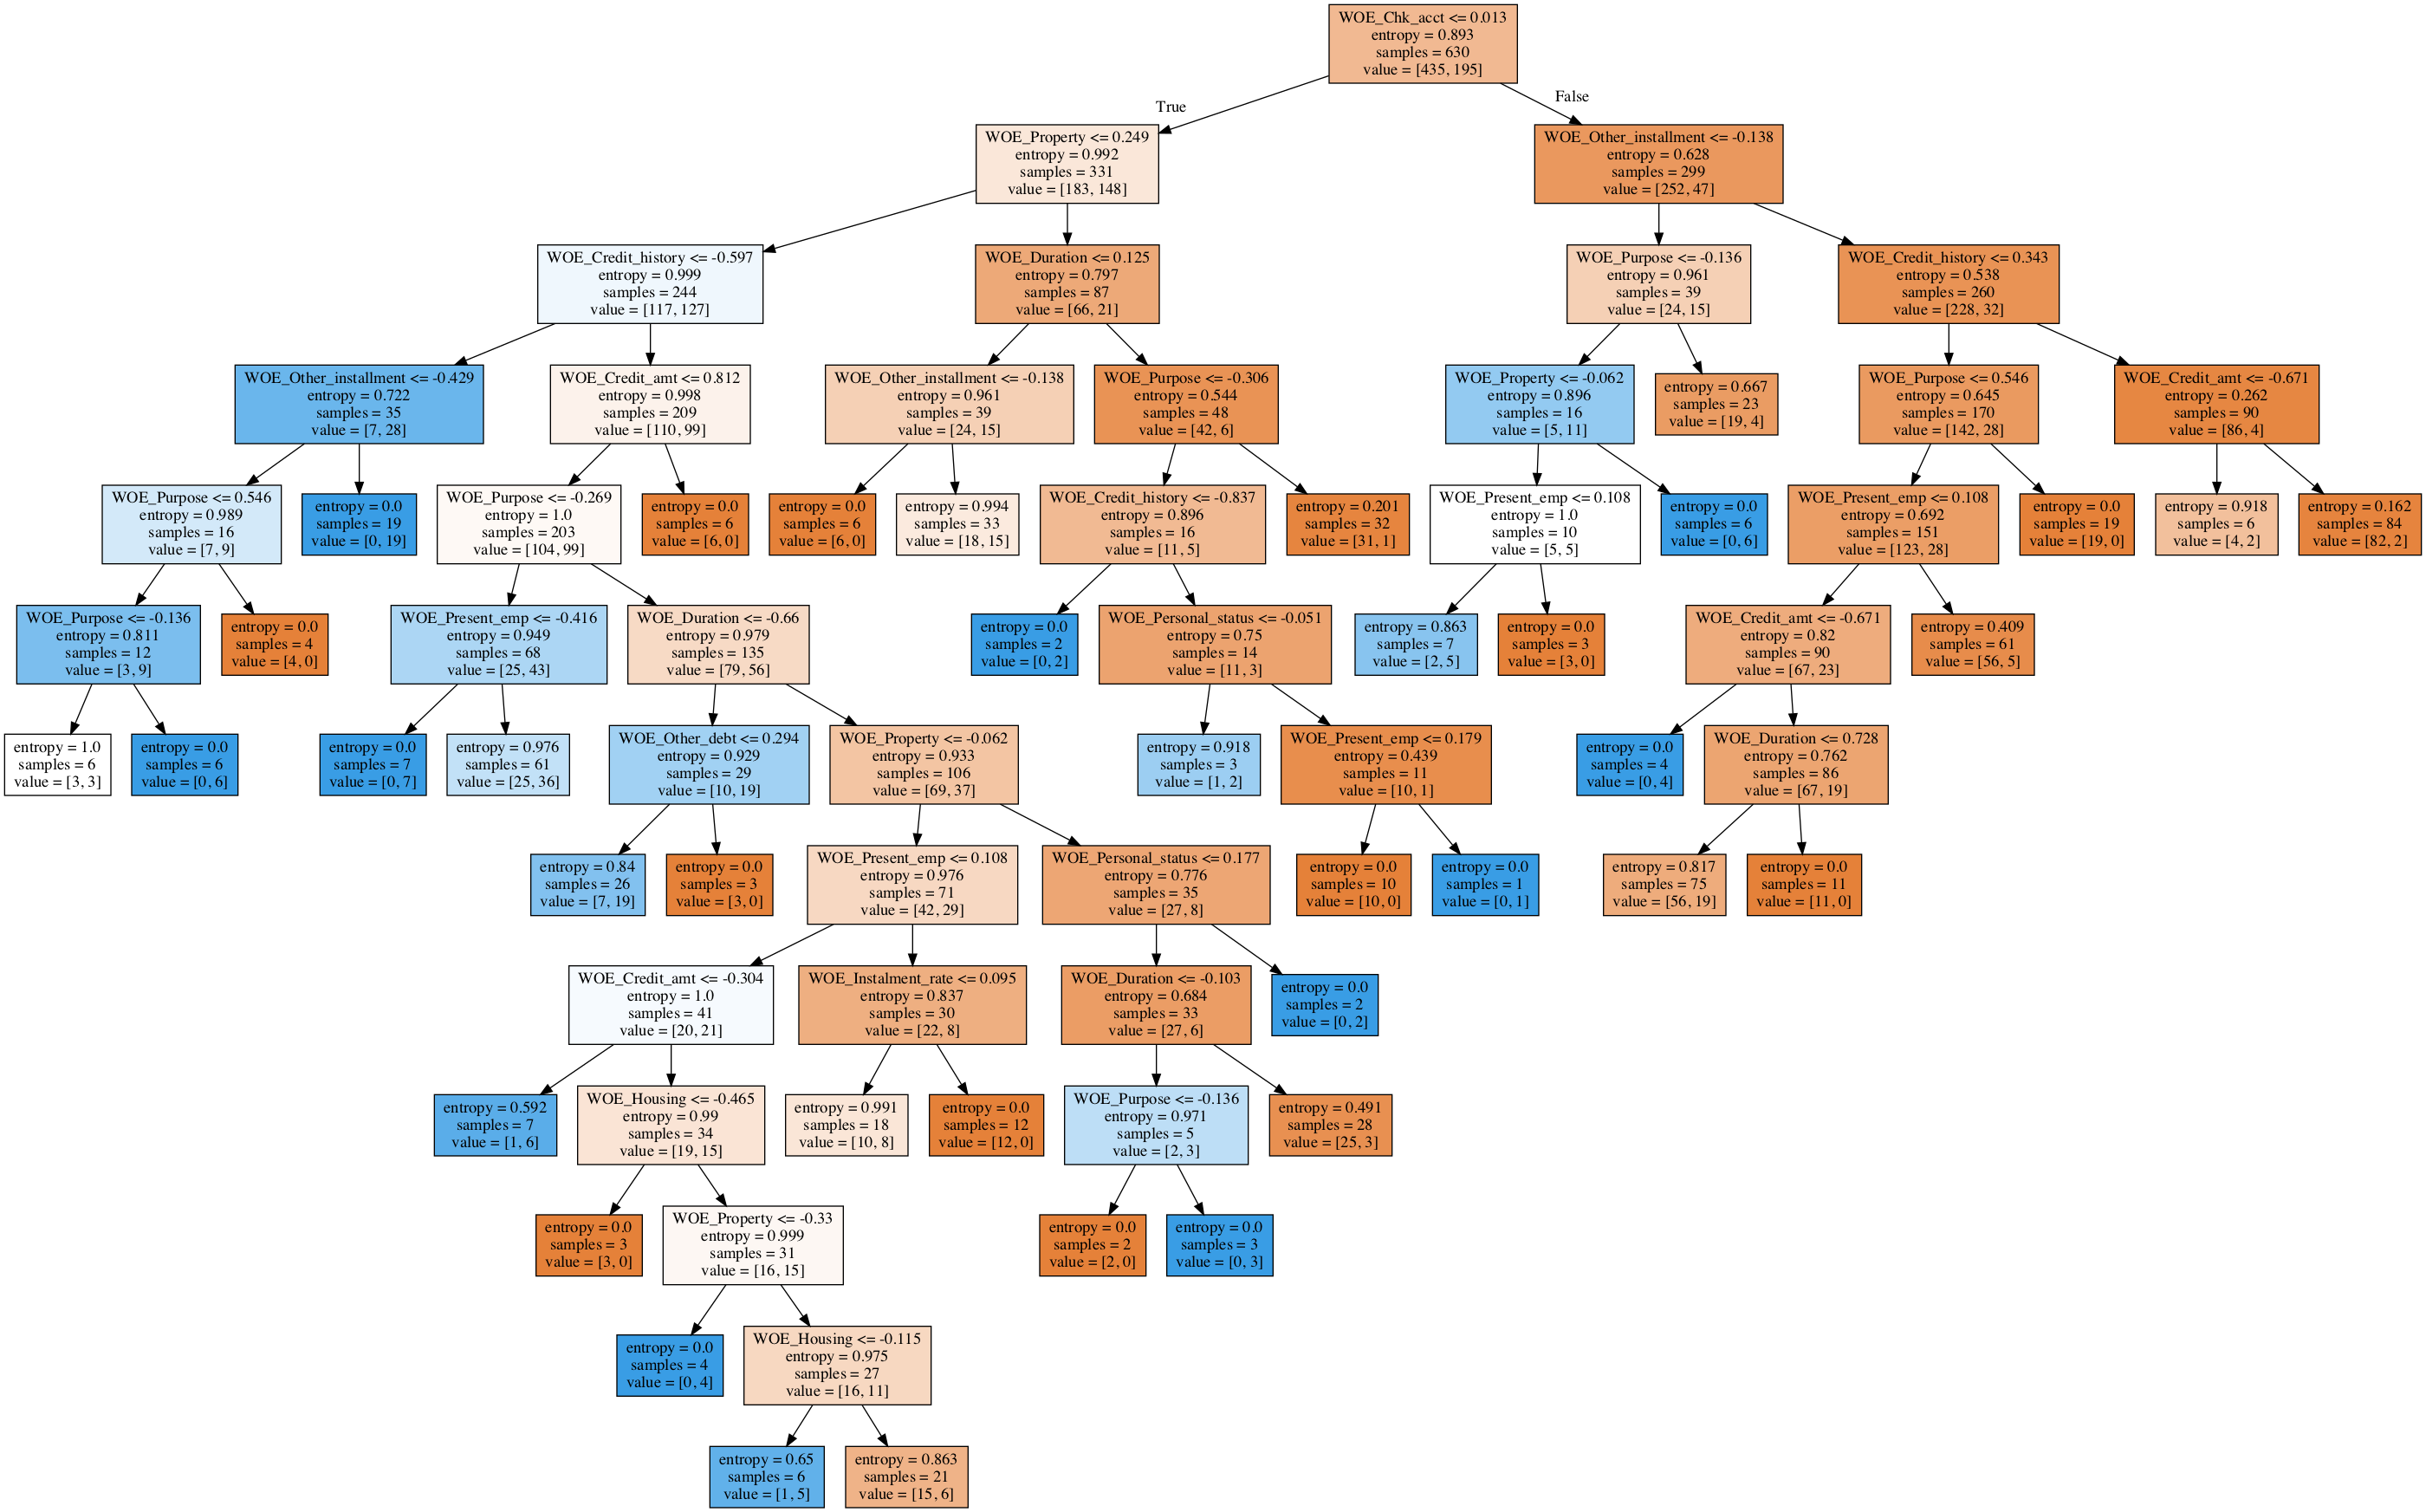

In [214]:
opt_tree = trees[opt_idx]
dot_data = tree.export_graphviz(opt_tree, filled=True, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

## 4) Random Forest

### Grid search

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def random_forest(trainx, trainy):
    rf = RandomForestClassifier(criterion='entropy')
    rf.fit(trainx, trainy)
    
    n_estimators = list(np.arange(200, 2010, 100))
    max_features = list(np.arange(2, 11, 1))
    grid_params = {'n_estimators': n_estimators,
                   'max_features': max_features}
    grid_search = GridSearchCV(rf, param_grid=grid_params, cv=10).fit(trainx, trainy)
    
    best_estimator = grid_search.best_estimator_
    best_param = grid_search.best_params_
    
    return best_estimator, best_param

In [89]:
best_estimator, best_param = random_forest(X_train, y_train)

In [90]:
best_estimator

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
best_param

{'max_features': 3, 'n_estimators': 1600}

### Results based on optimal hyper parameters

In [215]:
# fit random forest using the optimal set of hyper parameters 
rf_opt = RandomForestClassifier(criterion='entropy', n_estimators=best_param['n_estimators'], max_features=best_param['max_features'], random_state=0)
rf_opt.fit(X_train, y_train)

# in-sample prediction
y_pred_rf_insample = rf_opt.predict(X_train)
rf_score_insample = metrics.accuracy_score(y_train, y_pred_rf_insample)
rf_score_insample

0.9985714285714286

In [216]:
def cnf_matrix(y_test, y_predict_class):
    cnf_matrix = metrics.confusion_matrix(y_test, y_predict_class)
    ax = plt.subplot()
    sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_ylim([0,2])
    ax.set_xlabel('Predicted Credit Status')
    ax.set_ylabel('Actual Credit Status')
    ax.set_title('Confusion Matrix')

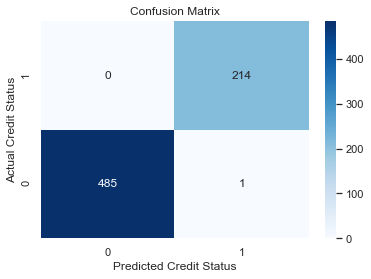

In [217]:
cnf_matrix(y_train, y_pred_rf_insample)

In [218]:
'''In sample accuracy is pretty high, but possibly the model is overfitted'''

'In sample accuracy is pretty high, but possibly the model is overfitted'

### Visualizing variable's importance

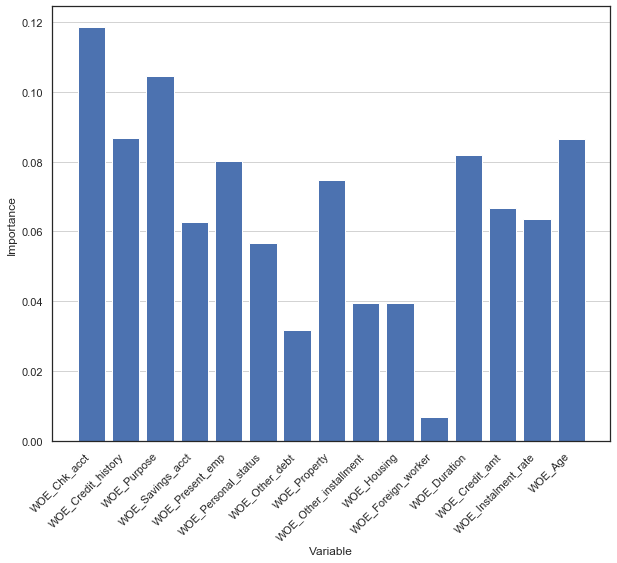

In [219]:
# Get variables' importance
vars_ = X.columns
importances = list(rf_opt.feature_importances_)

# Visualize variables' importance
plt.figure(figsize=(10,8))
plt.bar(vars_, importances, align="center")
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', color='#D3D3D3', linestyle='solid')
plt.show()

# Section V - Performance Validation

## 1) Out of Sample Prediction - Default Probability 

### (a) Logistic Regression

In [220]:
# cutoff value is obtained from KS test
cutoff_logit

0.27402042564824564

In [221]:
# predict out of sample default probability 
y_pred_logit = logit_predict_prob(X_test_logit, b_logit, fit_intercept=1)
d_logit = {'Default Prob - Logistic Regression': y_pred_logit}
df_prob_logit = pd.DataFrame(data=d_logit)
df_prob_logit

,Default Prob - Logistic Regression
0,0.886638
1,0.048914
2,0.121786
3,0.445930
4,0.432148
...,...
295,0.238076
296,0.748280
297,0.053627
298,0.909238


In [222]:
def logit_predict_class(X, b, cutoff, fit_intercept=1):
    predictProb = logit_predict_prob(X, b, fit_intercept=1)
    predictClass = [0 if x <= cutoff else 1 for x in predictProb]
    return predictClass

In [223]:
predict_class_logit = logit_predict_class(X_test_logit, b_logit, cutoff_logit, fit_intercept=1)
accuracy_logit = metrics.accuracy_score(y_test, predict_class_logit)
accuracy_logit

0.7166666666666667

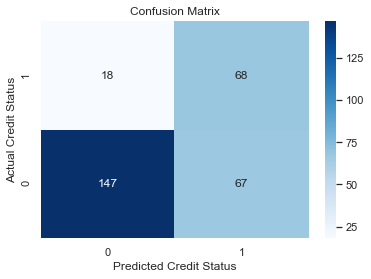

In [224]:
cnf_matrix(y_test, predict_class_logit)

### (b) Stepwise Logistic Regression

In [225]:
# cutoff value is obtained from KS test
cutoff_swlogit

0.27402042564824564

In [226]:
# predict out of sample default probability 
y_pred_swlogit = logit_predict_prob(X_test_swlogit, b_swlogit, fit_intercept=1)
d_swlogit = {'Default Prob - Stepwise Logistic Regression': y_pred_swlogit}
df_prob_swlogit = pd.DataFrame(data=d_swlogit)
df_prob_swlogit

,Default Prob - Stepwise Logistic Regression
0,0.886638
1,0.048914
2,0.121786
3,0.445930
4,0.432148
...,...
295,0.238076
296,0.748280
297,0.053627
298,0.909238


In [227]:
predict_class_swlogit = logit_predict_class(X_test_swlogit, b_swlogit, cutoff_swlogit, fit_intercept=1)
accuracy_swlogit = metrics.accuracy_score(y_test, predict_class_swlogit)
accuracy_swlogit

0.7166666666666667

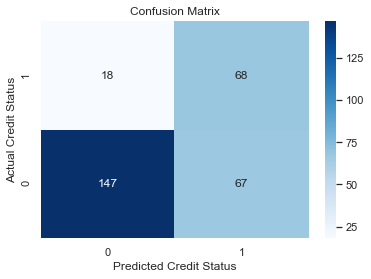

In [228]:
cnf_matrix(y_test, predict_class_swlogit)

### (c) Decision Tree

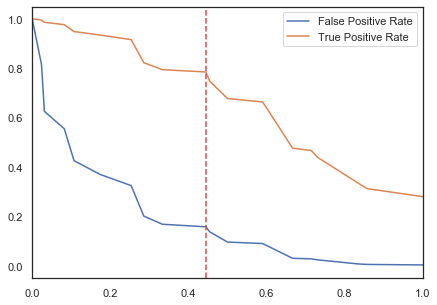

Maximum KS is 0.627%
Cut-off value is chosen as 0.444


In [229]:
# cutoff value is obtained from KS test
y_pred_dt_insample = opt_tree.predict_proba(X_train)[:,1]
cutoff_dt, KS_dt = KS_test(y_train, y_pred_dt_insample)

In [230]:
# predict out of sample default probability 
y_pred_dt = opt_tree.predict_proba(X_test)[:,1]
d_dt = {'Default Prob - Decision Tree': y_pred_dt}
df_prob_dt = pd.DataFrame(data=d_dt)
df_prob_dt

,Default Prob - Decision Tree
0,0.730769
1,0.253333
2,0.253333
3,1.000000
4,0.081967
...,...
295,0.031250
296,0.730769
297,0.023810
298,1.000000


In [231]:
predict_class_dt = (opt_tree.predict_proba(X_test)[:,1] >= cutoff_dt).astype(bool)
accuracy_dt = metrics.accuracy_score(y_test, predict_class_dt)
accuracy_dt

0.6966666666666667

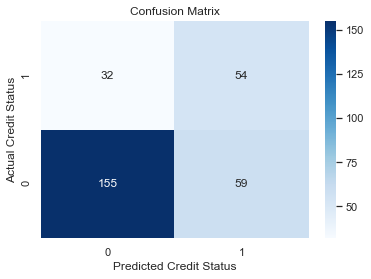

In [232]:
cnf_matrix(y_test, predict_class_dt)

### (d) Random Forest

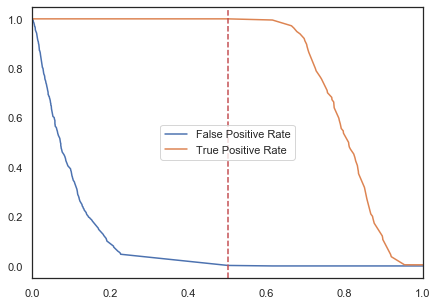

Maximum KS is 0.998%
Cut-off value is chosen as 0.501


In [233]:
# cutoff value is obtained from KS test
y_pred_rf_insample = rf_opt.predict_proba(X_train)[:,1]
cutoff_rf, KS_rf = KS_test(y_train, y_pred_rf_insample)

In [234]:
# predict out of sample default probability 
y_pred_rf = rf_opt.predict_proba(X_test)[:,1]
d_rf = {'Default Prob - Decision Tree': y_pred_rf}
df_prob_rf = pd.DataFrame(data=d_rf)
df_prob_rf

,Default Prob - Decision Tree
0,0.866250
1,0.140625
2,0.063437
3,0.372500
4,0.205000
...,...
295,0.251250
296,0.651698
297,0.174375
298,0.840000


In [235]:
predict_class_rf = (rf_opt.predict_proba(X_test)[:,1] >= cutoff_rf).astype(bool)
accuracy_rf = metrics.accuracy_score(y_test, predict_class_rf)
accuracy_rf

0.7666666666666667

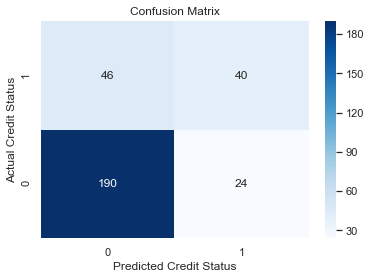

In [236]:
cnf_matrix(y_test, predict_class_rf)

## 2) Brier Score

In [237]:
# Brier score calculates the mean squared error between predicted probabilities and the expected values
# The error score is always between 0 and 1, where a model with perfect skill has a score of 0

def Brier_Score(actuals, preds):
    n = float(len(preds))
    return (1/n) * np.sum((preds-actuals)**2)

### (a) Logistic Regression

In [238]:
BrierScore_logit = Brier_Score(y_test, y_pred_logit)
BrierScore_logit

0.16165774899758018

### (b) Stepwise Logistic Regression

In [239]:
BrierScore_swlogit = Brier_Score(y_test, y_pred_swlogit)
BrierScore_swlogit

0.16165774899758018

### (c) Decision Tree

In [240]:
BrierScore_dt = Brier_Score(y_test, y_pred_dt)
BrierScore_dt

0.23503480130940102

### (d) Random Forest

In [241]:
BrierScore_rf = Brier_Score(y_test, y_pred_rf)
BrierScore_rf

0.16038671536416998

## 3) Hosmer–Lemeshow (HL) Test

In [242]:
# The Hosmer-Lemeshow goodness of fit test is based on dividing the sample up according to their predicted prob.
# To calculate how many Y=1 observations we would expect, the HL test takes the average of the predicted prob.
# in the group, and multiplies this by the number of observations in the group
# The test also performs the same calculation for Y=0, and then calculates a Pearson goodness of fit statistic

# The test statistic approximately followed a chi-squared distribution on g-2 degrees of freedom

# The p-value can be calculated as the right hand tail probability of the corresponding chi-squared distribution 
# using the calculated test statistic. If the p-value is small, this is indicative of poor fit

def HL_Test(data, q):
    # arrange the dataset ranking by Prob.
    data = data.sort_values('Prob')
    # divide the dataset into q groups on the basis of the deciles
    data['Prob_decile'] = pd.qcut(data['Prob'], q, duplicates='drop')
    # number of defaults(1s) in each group
    y_default = data['Target'].groupby(data['Prob_decile']).sum()
    # total number in each group
    y_total = data['Target'].groupby(data['Prob_decile']).count()
    # number of non-defaults(0s) in each group
    y_nondefault = y_total - y_default
    
    # sum the default probs in each group
    prob_default = data['Prob'].groupby(data['Prob_decile']).sum()
    # total prob in each group
    prob_total = data['Prob'].groupby(data['Prob_decile']).count()
    # the non-default probs in each group
    prob_nondefault = prob_total - prob_default
    
    # Hosmer-Lemeshow (chi-squared) test statistic
    hl_test = ( ((y_default-prob_default)**2 / prob_default) + ((y_nondefault-prob_nondefault)**2 / prob_nondefault) ).sum()
    
    # p-value
    p_val = 1 - stats.chi2.cdf(hl_test, q-2)
    degree_freedom = q-2
    
    print('\n HL-chi2 (df={}): {}, \n p-value: {}\n'.format(degree_freedom, hl_test, p_val))
    return hl_test, p_val

### (a) Logistic Regression

In [243]:
# create a dataframe containing two columns (y_test & y_pred_logit)
d_logit = {'Target': y_test, 'Prob': y_pred_logit}
df_HL_logit = pd.DataFrame(data=d_logit)
df_HL_logit = df_HL_logit.reset_index()
df_HL_logit = df_HL_logit.drop(['index'], axis=1)

HL_logit, HL_pvalue_logit = HL_Test(df_HL_logit, 10)


 HL-chi2 (df=8): 15.781014384490035, 
 p-value: 0.04562389330026495



### (b) Stepwise Logistic Regression

In [244]:
# create a dataframe containing two columns (y_test & y_pred_swlogit)
d_swlogit = {'Target': y_test, 'Prob': y_pred_swlogit}
df_HL_swlogit = pd.DataFrame(data=d_swlogit)
df_HL_swlogit = df_HL_swlogit.reset_index()
df_HL_swlogit = df_HL_swlogit.drop(['index'], axis=1)

HL_swlogit, HL_pvalue_swlogit = HL_Test(df_HL_swlogit, 10)


 HL-chi2 (df=8): 15.781014384490035, 
 p-value: 0.04562389330026495



### (c) Decision Tree

In [254]:
# create a dataframe containing two columns (y_test & y_pred_dt)
d_dt = {'Target': y_test, 'Prob': y_pred_dt}
df_HL_dt = pd.DataFrame(data=d_dt)
df_HL_dt = df_HL_dt.reset_index()
df_HL_dt = df_HL_dt.drop(['index'], axis=1)

HL_dt, HL_pvalue_dt = HL_Test(df_HL_dt, 10)


 HL-chi2 (df=8): 339.37980851950437, 
 p-value: 0.0



### (d) Random Forest

In [246]:
# create a dataframe containing two columns (y_test & y_pred_rf)
d_rf = {'Target': y_test, 'Prob': y_pred_rf}
df_HL_rf = pd.DataFrame(data=d_rf)
df_HL_rf = df_HL_rf.reset_index()
df_HL_rf = df_HL_rf.drop(['index'], axis=1)

HL_rf, HL_pvalue_rf = HL_Test(df_HL_rf, 10)


 HL-chi2 (df=8): 6.58126096830215, 
 p-value: 0.5824089068477903



## 4) ROC Curves

### (a) Logistic Regression

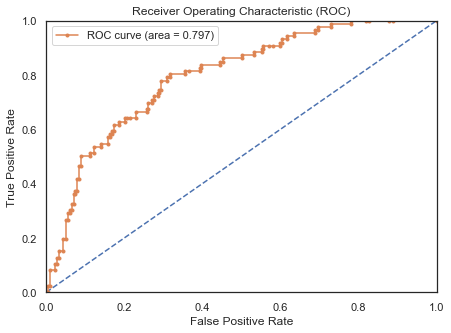

In [247]:
AUC_logit = ROC_plot(y_test, y_pred_logit)

### (b) Stepwise Logistic Regression

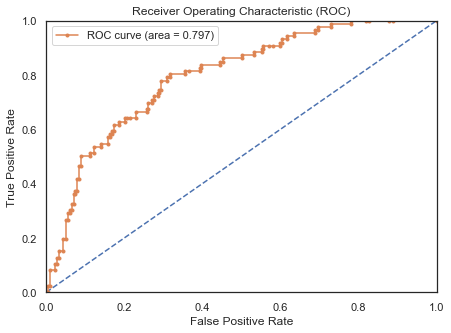

In [248]:
AUC_swlogit = ROC_plot(y_test, y_pred_swlogit)

### (c) Decision Tree

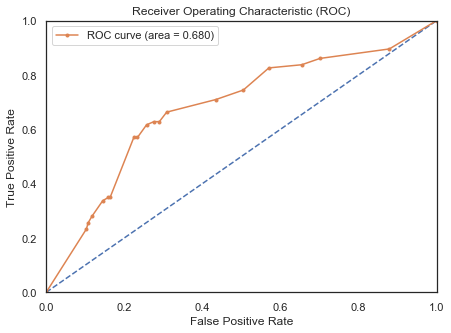

In [249]:
AUC_dt = ROC_plot(y_test, y_pred_dt)

### (d) Random Forest

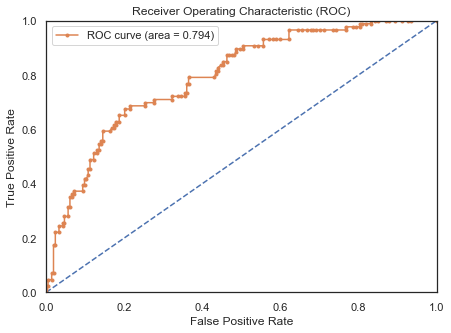

In [250]:
AUC_rf = ROC_plot(y_test, y_pred_rf)

## 5) Final Model Recommendation

In [251]:
df_result = pd.DataFrame(columns = ['Logistic','Stepwise Logistic','Decision Tree','Random Forest'], 
                         index=['Accuracy Score','Brier Score','HL Test P-value', 'AUC'])

def model_comparison():
    # Accuracy_score
    accuracy_list = [accuracy_logit, accuracy_swlogit, accuracy_dt, accuracy_rf]
    df_result.loc['Accuracy Score'] = accuracy_list
    
    # Brier score
    brier_score_list = [BrierScore_logit, BrierScore_swlogit, BrierScore_dt, BrierScore_rf]
    df_result.loc['Brier Score'] = brier_score_list
    
    # Brier score
    HL_list = [HL_pvalue_logit, HL_pvalue_swlogit, HL_pvalue_dt, HL_pvalue_rf]
    df_result.loc['HL Test P-value'] = HL_list
    
    # AUC
    AUC_list = [AUC_logit, AUC_swlogit, AUC_dt, AUC_rf]
    df_result.loc['AUC'] = AUC_list
    
    return df_result

In [252]:
model_comparison()

,Logistic,Stepwise Logistic,Decision Tree,Random Forest
Accuracy Score,0.716667,0.716667,0.696667,0.766667
Brier Score,0.161658,0.161658,0.235035,0.160387
HL Test P-value,0.0456239,0.0456239,0,0.582409
AUC,0.796675,0.796675,0.679716,0.793632
